# Analiza jakości powietrza oraz parametrów pogodowych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
import glob
import folium

#  1 Wczytanie danych

In [2]:
all_file_names = glob.glob("Data/*2017.csv")
all_file_names = sorted(all_file_names)

In [3]:
for counter, file in enumerate(all_file_names):
    print(counter, file)

0 Data/april-2017.csv
1 Data/august-2017.csv
2 Data/december-2017.csv
3 Data/february-2017.csv
4 Data/january-2017.csv
5 Data/july-2017.csv
6 Data/june-2017.csv
7 Data/march-2017.csv
8 Data/may-2017.csv
9 Data/november-2017.csv
10 Data/october-2017.csv
11 Data/september-2017.csv


In [4]:
jan = pd.read_csv(all_file_names[4])
feb = pd.read_csv(all_file_names[3])
mar = pd.read_csv(all_file_names[7])
apr = pd.read_csv(all_file_names[0])
may = pd.read_csv(all_file_names[8])
jun = pd.read_csv(all_file_names[6])
jul = pd.read_csv(all_file_names[5])
aug = pd.read_csv(all_file_names[1])
sep = pd.read_csv(all_file_names[11])
octo = pd.read_csv(all_file_names[10])
nov = pd.read_csv(all_file_names[9])
dec = pd.read_csv(all_file_names[2])

In [5]:
year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])

In [6]:
sensors = pd.read_csv("Data/sensor_locations.csv")

# 2 Przegląd danych

## 2.1 Sensory

Dane pochodzą z 56 sensorów umieszczonych na terenie Krakowa. Ich rozmieszczenie przedstawia poniższa mapa. Najprawdopodobniej czujnik nr 3 został zamieniony przez czujnik 140 (niemal identyczna lokalizacja, a daty pomiarów nie pokrywają się ze sobą).

In [7]:
sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         56 non-null     int64  
 1   latitude   56 non-null     float64
 2   longitude  56 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.4 KB


In [8]:
m = folium.Map(location=[50.057748, 19.961375], zoom_start=12)
tooltip = 'Kliknij, aby zobaczyć id czujnika'
for id, sensor in sensors.iterrows():
    folium.Marker([sensor['latitude'], 
                   sensor['longitude']], 
                  popup='sensor_id {:d}'.format(int(sensor['id'])), 
                  tooltip=tooltip).add_to(m)   
    
m

In [9]:
year.tail()

UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
572  2017-12-24T20:00:00            NaN         NaN         NaN    NaN   
573  2017-12-24T21:00:00            NaN         NaN         NaN    NaN   
574  2017-12-24T22:00:00            NaN         NaN         NaN    NaN   
575  2017-12-24T23:00:00            NaN         NaN         NaN    NaN   
576  2017-12-25T00:00:00            NaN         NaN         NaN    NaN   

     3_pm25  3_pm10  140_temperature  140_humidity  140_pressure  ...  \
572     NaN     NaN              6.0          87.0      101736.0  ...   
573     NaN     NaN              6.0          88.0      101776.0  ...   
574     NaN     NaN              6.0          85.0      101785.0  ...   
575     NaN     NaN              5.0          88.0      101782.0  ...   
576     NaN     NaN              6.0          88.0      101784.0  ...   

     857_pressure  857_pm1  857_pm25  857_pm10  895_temperature  895_humidity  \
572      101726.0     12.0      15.0      31.0              5.0          85.0   
573      101771.0     12.0      14.0      29.0              5.0          85.0   
574      101788.0     10.0      12.0      26.0              5.0          82.0   
575      101774.0      9.0      11.0      24.0              5.0          85.0   
576      101774.0     10.0      11.0      23.0              5.0          85.0   

     895_pressure  895_pm1  895_pm25  895_pm10  
572      101798.0     13.0      15.0      26.0  
573      101840.0     12.0      13.0      23.0  
574      101839.0     10.0      12.0      21.0  
575      101837.0     10.0      12.0      21.0  
576      101840.0     10.0      11.0      20.0  

[5 rows x 337 columns]

In [10]:
year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8593 entries, 0 to 576
Columns: 337 entries, UTC time to 895_pm10
dtypes: float64(336), object(1)
memory usage: 22.2+ MB


In [11]:
temp_col = [col for col in year if 'temperature' in col or col.startswith('UTC time')]
humi_col = [col for col in year if 'humidity' in col or col.startswith('UTC time')]
pres_col = [col for col in year if 'pressure' in col or col.startswith('UTC time')]
pm25_col = [col for col in year if 'pm25' in col or col.startswith('UTC time')]
pm10_col = [col for col in year if 'pm10' in col or col.startswith('UTC time')]
pm1_col = [col for col in year if col.endswith('pm1') or col.startswith('UTC time')]

## 2.2 Temperatura

Poniższy wykres pudełkowy ilustruje odczyty temperatury poszczególnych sensorów.

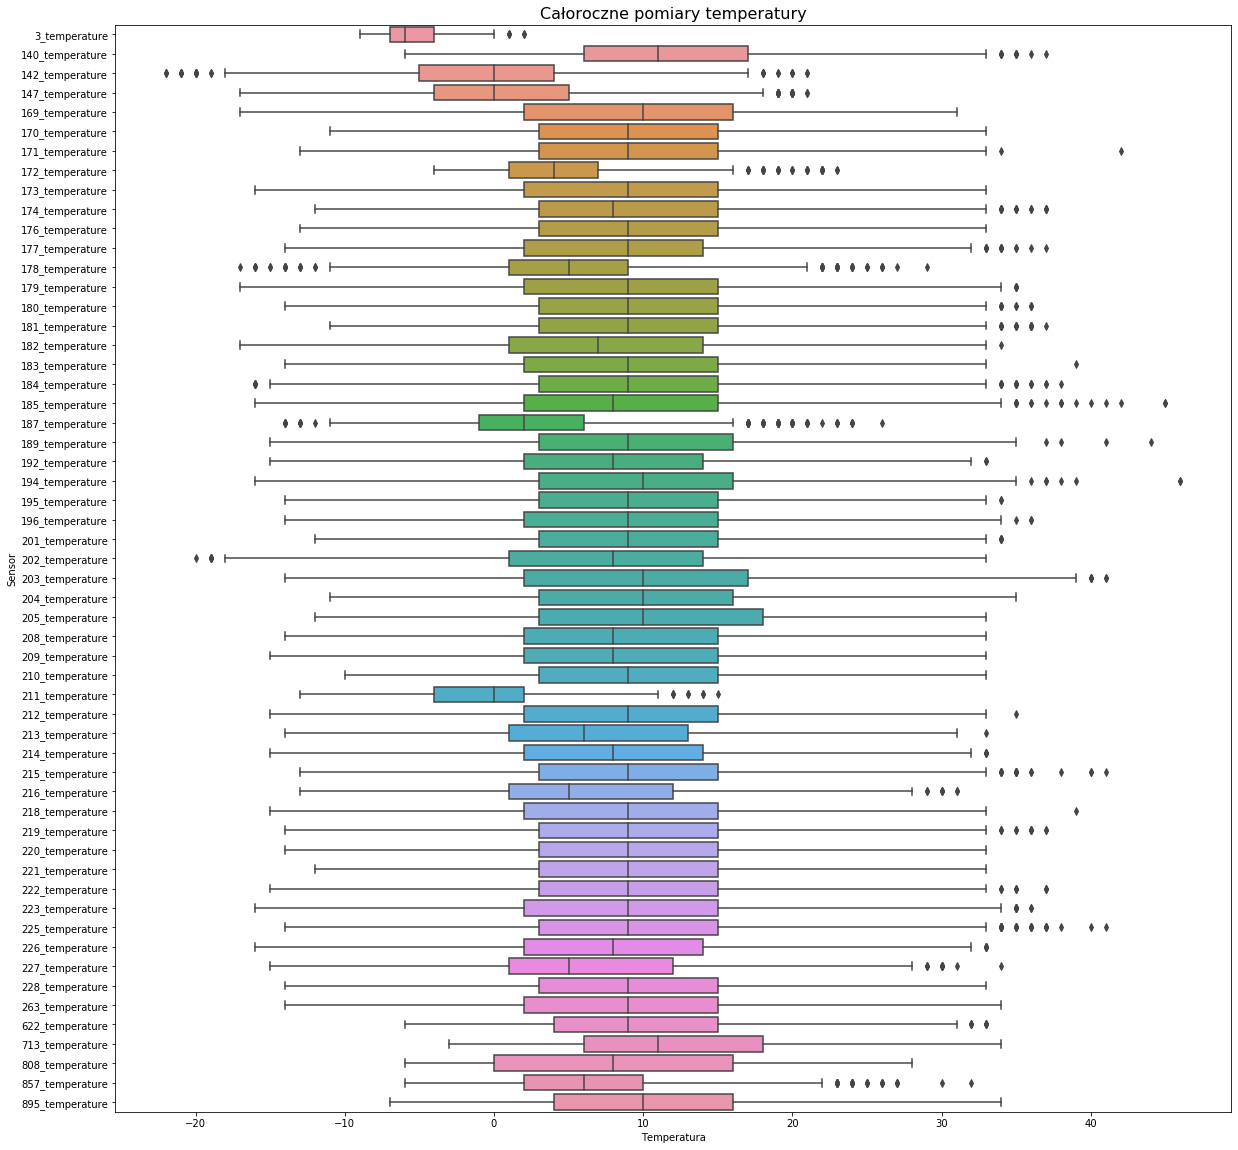

In [12]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=year[temp_col], orient="h")
_ = plt.title("Całoroczne pomiary temperatury", fontsize=16)
_ = plt.ylabel("Sensor")
_ = plt.xlabel("Temperatura")
_ = plt.show()

In [13]:
year[temp_col].describe()

3_temperature  140_temperature  142_temperature  147_temperature  \
count     206.000000      6506.000000      2066.000000      2301.000000   
mean       -5.131068        11.464494        -0.228461         0.924815   
std         2.174645         7.630920         6.668424         6.895178   
min        -9.000000        -6.000000       -22.000000       -17.000000   
25%        -7.000000         6.000000        -5.000000        -4.000000   
50%        -6.000000        11.000000         0.000000         0.000000   
75%        -4.000000        17.000000         4.000000         5.000000   
max         2.000000        37.000000        21.000000        21.000000   

       169_temperature  170_temperature  171_temperature  172_temperature  \
count      8262.000000      8460.000000      8514.000000      1596.000000   
mean          8.706609         9.358038         9.145525         4.652256   
std           9.254376         8.044169         8.344350         4.516914   
min         -17.000000       -11.000000       -13.000000        -4.000000   
25%           2.000000         3.000000         3.000000         1.000000   
50%          10.000000         9.000000         9.000000         4.000000   
75%          16.000000        15.000000        15.000000         7.000000   
max          31.000000        33.000000        42.000000        23.000000   

       173_temperature  174_temperature  ...  225_temperature  \
count      8192.000000      7385.000000  ...      8431.000000   
mean          9.023682         9.187542  ...         9.465307   
std           8.201880         8.611477  ...         8.455561   
min         -16.000000       -12.000000  ...       -14.000000   
25%           2.000000         3.000000  ...         3.000000   
50%           9.000000         8.000000  ...         9.000000   
75%          15.000000        15.000000  ...        15.000000   
max          33.000000        37.000000  ...        41.000000   

       226_temperature  227_temperature  228_temperature  263_temperature  \
count      8579.000000      2926.000000      8529.000000      8423.000000   
mean          8.635272         6.277854         9.036464         8.844948   
std           8.286543         7.954123         8.126677         8.245934   
min         -16.000000       -15.000000       -14.000000       -14.000000   
25%           2.000000         1.000000         3.000000         2.000000   
50%           8.000000         5.000000         9.000000         9.000000   
75%          14.000000        12.000000        15.000000        15.000000   
max          33.000000        34.000000        33.000000        34.000000   

       622_temperature  713_temperature  808_temperature  857_temperature  \
count      5315.000000      2783.000000      1098.000000      2647.000000   
mean         10.175353        12.186130         8.584699         6.672459   
std           7.386840         7.468062         8.673697         5.581764   
min          -6.000000        -3.000000        -6.000000        -6.000000   
25%           4.000000         6.000000         0.000000         2.000000   
50%           9.000000        11.000000         8.000000         6.000000   
75%          15.000000        18.000000        16.000000        10.000000   
max          33.000000        34.000000        28.000000        32.000000   

       895_temperature  
count      5443.000000  
mean         10.660665  
std           7.864320  
min          -7.000000  
25%           4.000000  
50%          10.000000  
75%          16.000000  
max          34.000000  

[8 rows x 56 columns]

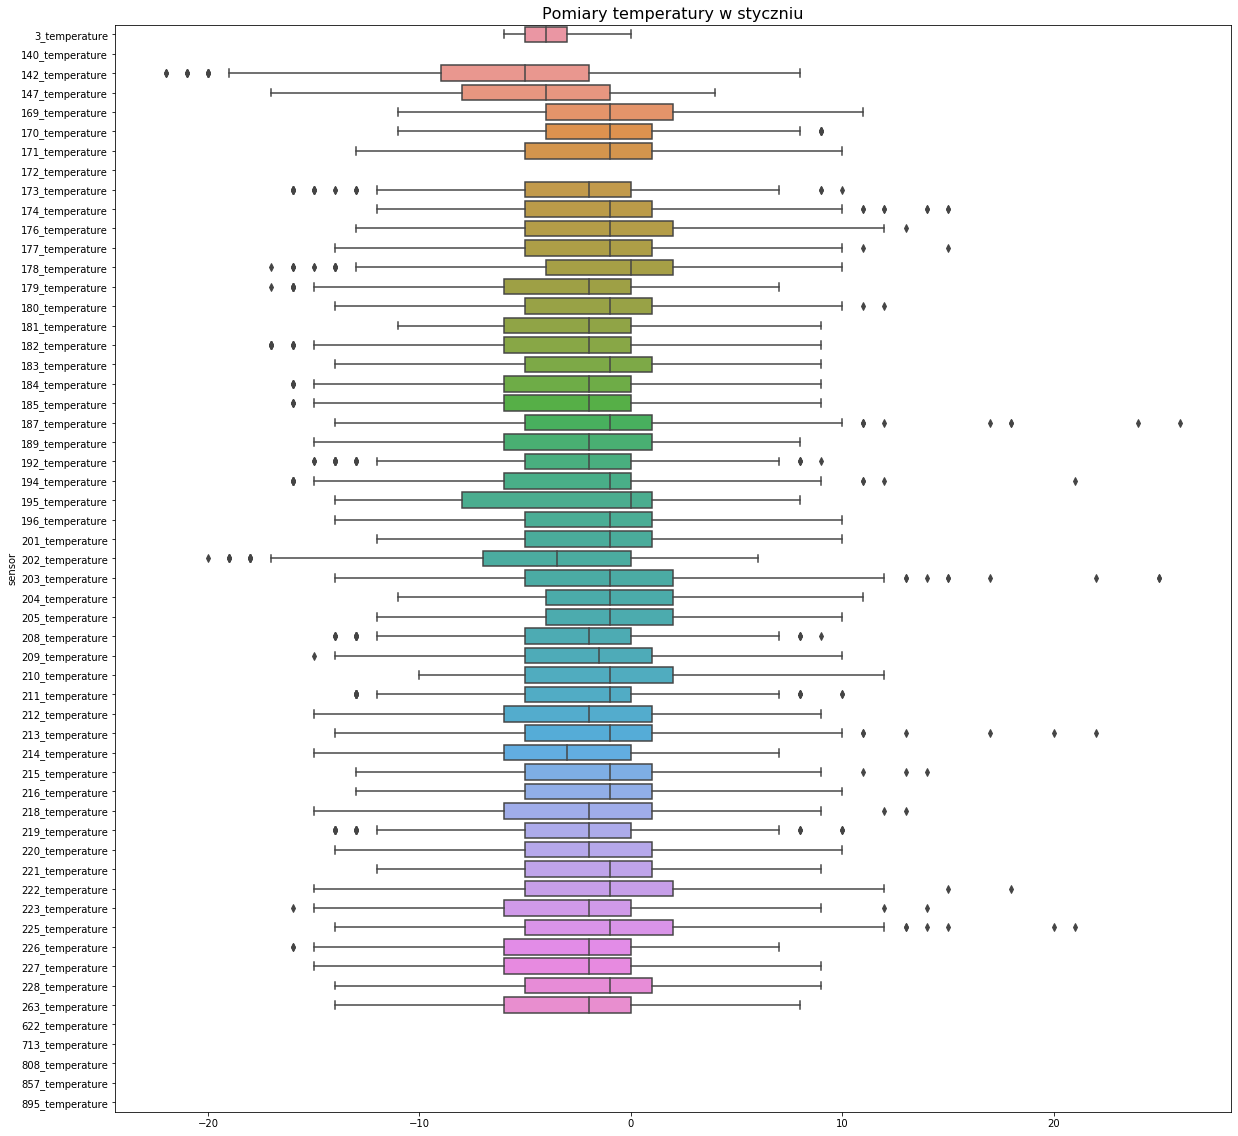

In [14]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=jan[temp_col], orient="h")
_ = plt.title("Pomiary temperatury w styczniu", fontsize=16)
_ = plt.ylabel("sensor")
_ = plt.show()

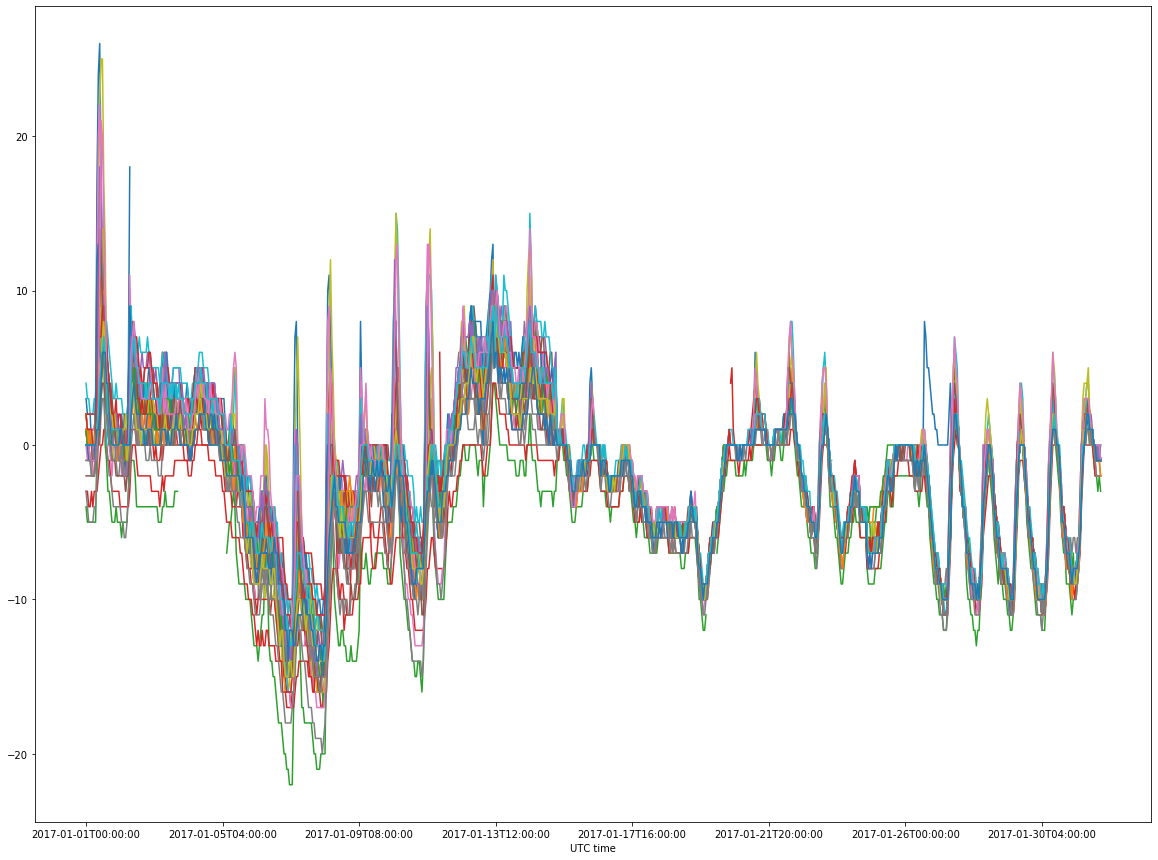

In [15]:
jan_temps = jan[temp_col].set_index('UTC time')
ax = jan_temps.plot(figsize =(20, 15), legend=None)
_ = plt.show()

5 sensorów w styczniu wskazało temperaturę powyżej 20 stopni Celcjusza. Wartości te wydają się być małoprawdopodobne biorąc pod uwagę porę roku i położenie Krakowa.

In [16]:
jan[['187_temperature', '194_temperature','203_temperature', '213_temperature', '225_temperature']].max()

187_temperature    26.0
194_temperature    21.0
203_temperature    25.0
213_temperature    22.0
225_temperature    21.0
dtype: float64

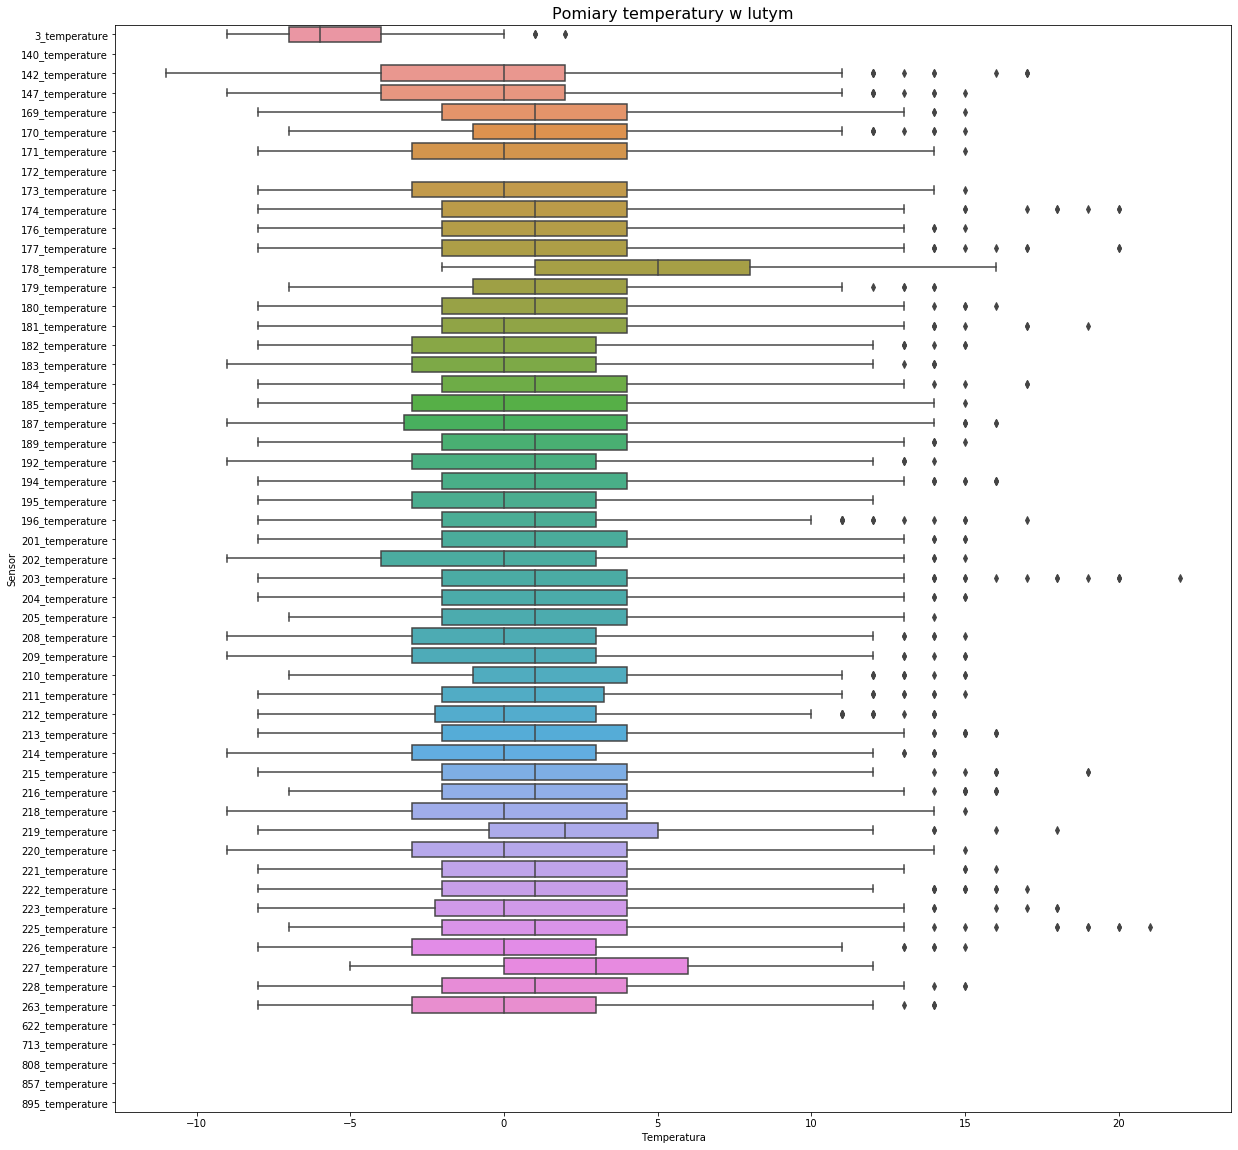

In [17]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=feb[temp_col], orient="h")
_ = plt.title("Pomiary temperatury w lutym", fontsize=16)
_ = plt.ylabel("Sensor")
_ = plt.xlabel("Temperatura")
_ = plt.show()

W lutym maksymale wskazania tych samych sensorów również wskazują dość wysokie temperatury. Co może wskazywać na problem z kalibracją czujników.

In [18]:
feb[['187_temperature', '194_temperature','203_temperature', '213_temperature', '225_temperature']].max()

187_temperature    16.0
194_temperature    16.0
203_temperature    22.0
213_temperature    16.0
225_temperature    21.0
dtype: float64

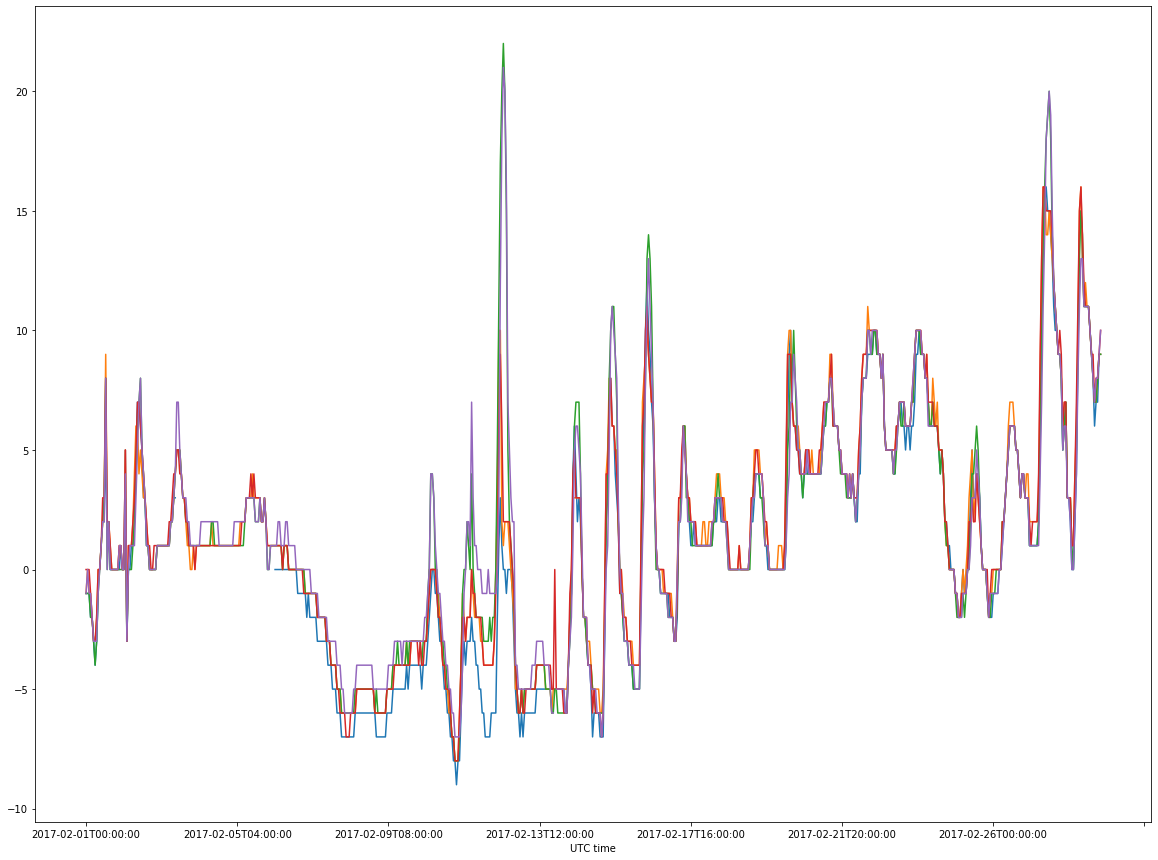

In [19]:
feb_high_temps = feb[temp_col].set_index('UTC time')
ax = feb_high_temps[['187_temperature', '194_temperature','203_temperature', '213_temperature', '225_temperature']].plot(figsize =(20, 15), legend=None)
_ = plt.show()

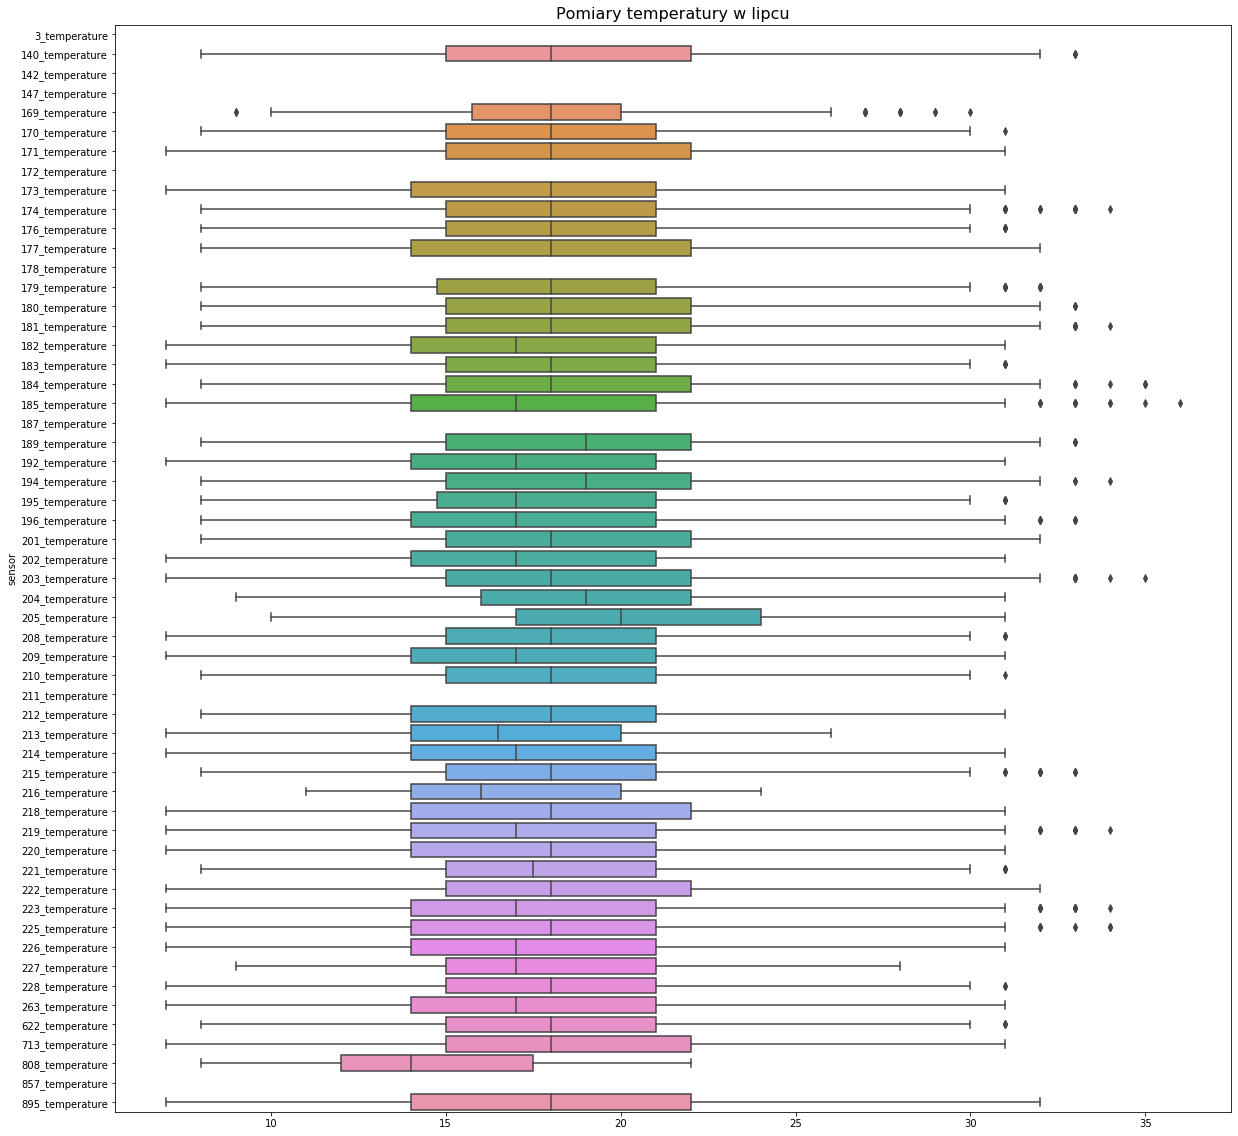

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=jul[temp_col], orient="h")
_ = plt.title("Pomiary temperatury w lipcu", fontsize=16)
_ = plt.ylabel("sensor")
_ = plt.show()

## 2.3 Wilgotność

In [21]:
year[humi_col].describe()

3_humidity  140_humidity  142_humidity  147_humidity  169_humidity  \
count  206.000000   6506.000000   2065.000000   2299.000000   8260.000000   
mean    74.718447     80.271288     75.006295     70.661592     73.132203   
std      9.939247     17.167440     15.303691     18.318723     17.668798   
min     38.000000     21.000000     24.000000     19.000000      2.000000   
25%     69.000000     70.000000     65.000000     56.000000     60.000000   
50%     77.000000     86.000000     79.000000     74.000000     76.000000   
75%     82.000000     93.000000     87.000000     86.000000     88.000000   
max     92.000000    115.000000    124.000000    104.000000    143.000000   

       170_humidity  171_humidity  172_humidity  173_humidity  174_humidity  \
count   8459.000000   8512.000000   1596.000000   8190.000000   7383.000000   
mean      60.608228     74.723919     61.489348     76.768742     71.180550   
std       22.108205     22.269863     13.974469     22.529074     22.803022   
min        2.000000     14.000000      1.000000     19.000000      7.000000   
25%       47.000000     61.000000     60.000000     62.000000     56.000000   
50%       65.000000     81.000000     65.000000     83.000000     78.000000   
75%       75.000000     92.000000     70.000000     92.000000     90.000000   
max      208.000000    171.000000     75.000000    221.000000    245.000000   

       ...  225_humidity  226_humidity  227_humidity  228_humidity  \
count  ...   8429.000000   8577.000000   2924.000000   8527.000000   
mean   ...     72.477281     69.997901     69.706566     75.053360   
std    ...     22.535357     19.193049     21.600359     21.650365   
min    ...      2.000000      9.000000      2.000000     17.000000   
25%    ...     58.000000     55.000000     51.000000     61.500000   
50%    ...     79.000000     76.000000     76.000000     82.000000   
75%    ...     90.000000     85.000000     88.000000     92.000000   
max    ...    171.000000    120.000000    111.000000    165.000000   

       263_humidity  622_humidity  713_humidity  808_humidity  857_humidity  \
count   8422.000000   5315.000000   2783.000000   1098.000000   2647.000000   
mean      77.651983     76.673754     73.675171     76.359745     78.817907   
std       17.943018     18.423173     17.481204     20.176633     11.851727   
min       23.000000     18.000000     17.000000     27.000000     33.000000   
25%       64.000000     65.000000     63.000000     63.000000     73.000000   
50%       83.000000     83.000000     80.000000     82.000000     82.000000   
75%       92.000000     91.000000     87.000000     89.000000     88.000000   
max      134.000000    134.000000    100.000000    134.000000    111.000000   

       895_humidity  
count   5443.000000  
mean      79.759691  
std       19.397843  
min       18.000000  
25%       69.000000  
50%       85.000000  
75%       92.000000  
max      134.000000  

[8 rows x 56 columns]

Już na pierwszy rzut oka można dostrzec, że wskazania wilgotności sensora 194 są nieprawidłowe, gdyż przyjmują wartości ujemne.

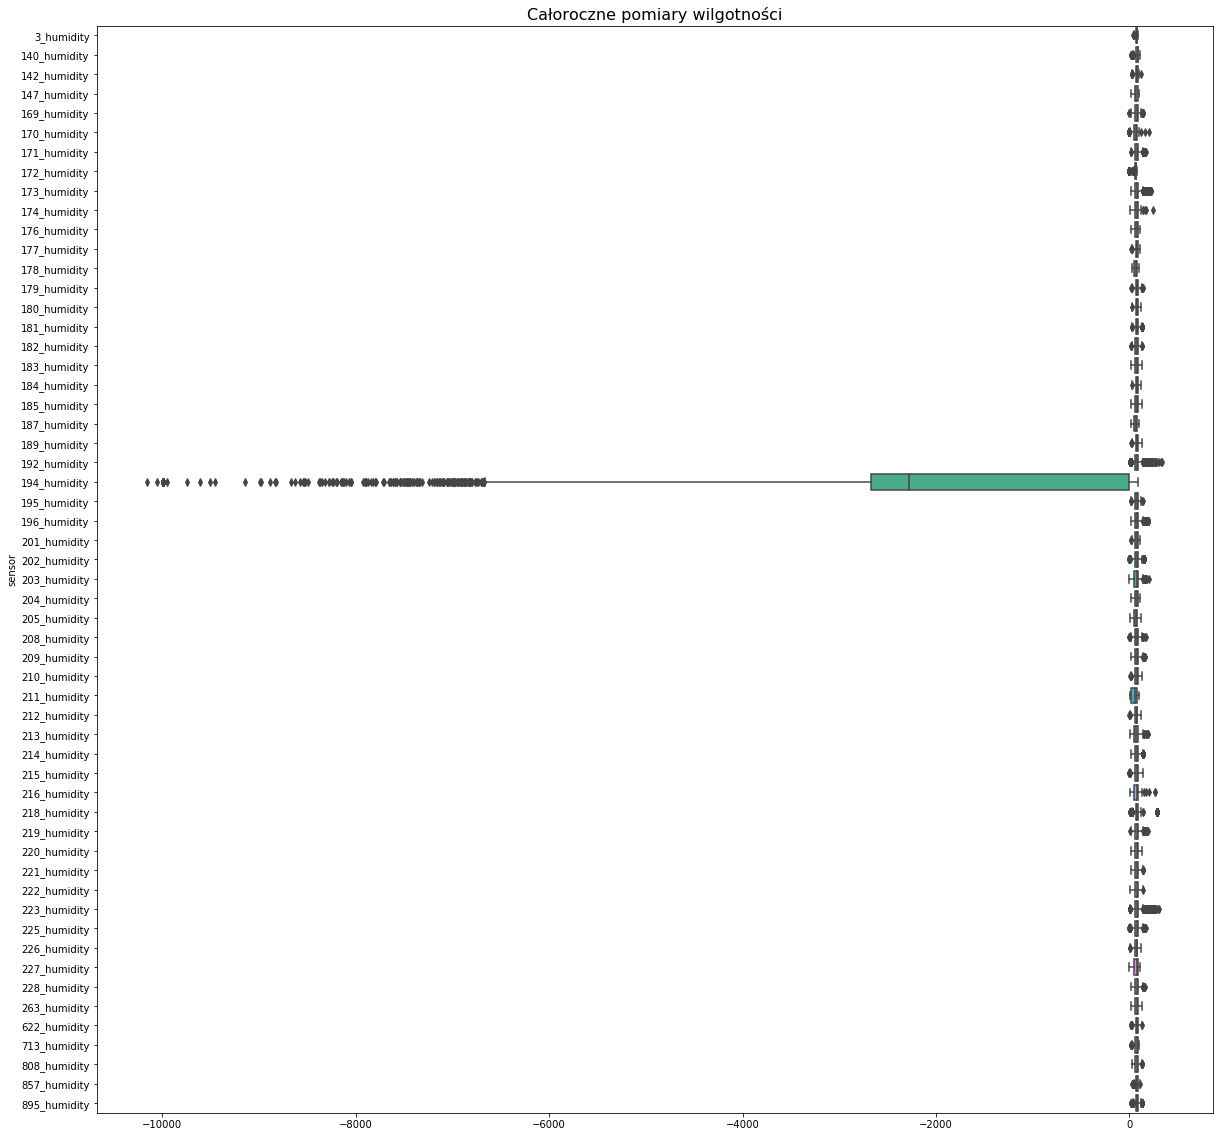

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=year[humi_col], orient="h")
_ = plt.title("Całoroczne pomiary wilgotności", fontsize =16)
_ = plt.ylabel("sensor")
_ = plt.show()

Potwierdzają to podstawowe statystyki. Zdecydowana większość pomiarów wilgotności przyjmuje wartości ujemne (około  72% wszystkich sensora 194).

In [23]:
s194_col = [col for col in year if '194' in col or col.startswith('UTC time')]
year[s194_col].describe(percentiles = [0.72])

194_temperature  194_humidity   194_pressure      194_pm1     194_pm25  \
count      8332.000000   8329.000000    8305.000000  8331.000000  8330.000000   
mean          9.912746  -2016.435346  101488.220108    28.044653    28.307443   
std           8.563878   1653.099000     831.634229    30.910504    32.697737   
min         -16.000000 -10157.000000   97386.000000     0.000000     0.000000   
50%          10.000000  -2283.000000  101545.000000    21.000000    19.000000   
72%          15.000000      0.000000  101939.000000    30.000000    30.000000   
max          46.000000     94.000000  103640.000000  1234.000000   277.000000   

          194_pm10  
count  8330.000000  
mean     45.406122  
std      49.333728  
min       0.000000  
50%      31.000000  
72%      50.000000  
max     447.000000

In [24]:
negative_hum_194 = year[year['194_humidity']<0]

In [25]:
negative_hum_194['194_humidity'].count()

5980

In [26]:
5980/8332

0.7177148343734998

In [27]:
year[humi_col].describe()

3_humidity  140_humidity  142_humidity  147_humidity  169_humidity  \
count  206.000000   6506.000000   2065.000000   2299.000000   8260.000000   
mean    74.718447     80.271288     75.006295     70.661592     73.132203   
std      9.939247     17.167440     15.303691     18.318723     17.668798   
min     38.000000     21.000000     24.000000     19.000000      2.000000   
25%     69.000000     70.000000     65.000000     56.000000     60.000000   
50%     77.000000     86.000000     79.000000     74.000000     76.000000   
75%     82.000000     93.000000     87.000000     86.000000     88.000000   
max     92.000000    115.000000    124.000000    104.000000    143.000000   

       170_humidity  171_humidity  172_humidity  173_humidity  174_humidity  \
count   8459.000000   8512.000000   1596.000000   8190.000000   7383.000000   
mean      60.608228     74.723919     61.489348     76.768742     71.180550   
std       22.108205     22.269863     13.974469     22.529074     22.803022   
min        2.000000     14.000000      1.000000     19.000000      7.000000   
25%       47.000000     61.000000     60.000000     62.000000     56.000000   
50%       65.000000     81.000000     65.000000     83.000000     78.000000   
75%       75.000000     92.000000     70.000000     92.000000     90.000000   
max      208.000000    171.000000     75.000000    221.000000    245.000000   

       ...  225_humidity  226_humidity  227_humidity  228_humidity  \
count  ...   8429.000000   8577.000000   2924.000000   8527.000000   
mean   ...     72.477281     69.997901     69.706566     75.053360   
std    ...     22.535357     19.193049     21.600359     21.650365   
min    ...      2.000000      9.000000      2.000000     17.000000   
25%    ...     58.000000     55.000000     51.000000     61.500000   
50%    ...     79.000000     76.000000     76.000000     82.000000   
75%    ...     90.000000     85.000000     88.000000     92.000000   
max    ...    171.000000    120.000000    111.000000    165.000000   

       263_humidity  622_humidity  713_humidity  808_humidity  857_humidity  \
count   8422.000000   5315.000000   2783.000000   1098.000000   2647.000000   
mean      77.651983     76.673754     73.675171     76.359745     78.817907   
std       17.943018     18.423173     17.481204     20.176633     11.851727   
min       23.000000     18.000000     17.000000     27.000000     33.000000   
25%       64.000000     65.000000     63.000000     63.000000     73.000000   
50%       83.000000     83.000000     80.000000     82.000000     82.000000   
75%       92.000000     91.000000     87.000000     89.000000     88.000000   
max      134.000000    134.000000    100.000000    134.000000    111.000000   

       895_humidity  
count   5443.000000  
mean      79.759691  
std       19.397843  
min       18.000000  
25%       69.000000  
50%       85.000000  
75%       92.000000  
max      134.000000  

[8 rows x 56 columns]

Ten sam wykres po usunięciu wyników dla sensora 194. Z poniższego wykresu można zaobserwować również błędne pomiary wskazujące % wilgotności powyżej 100 (poziom ten został zaznaczony czerwoną linią na wykresie).

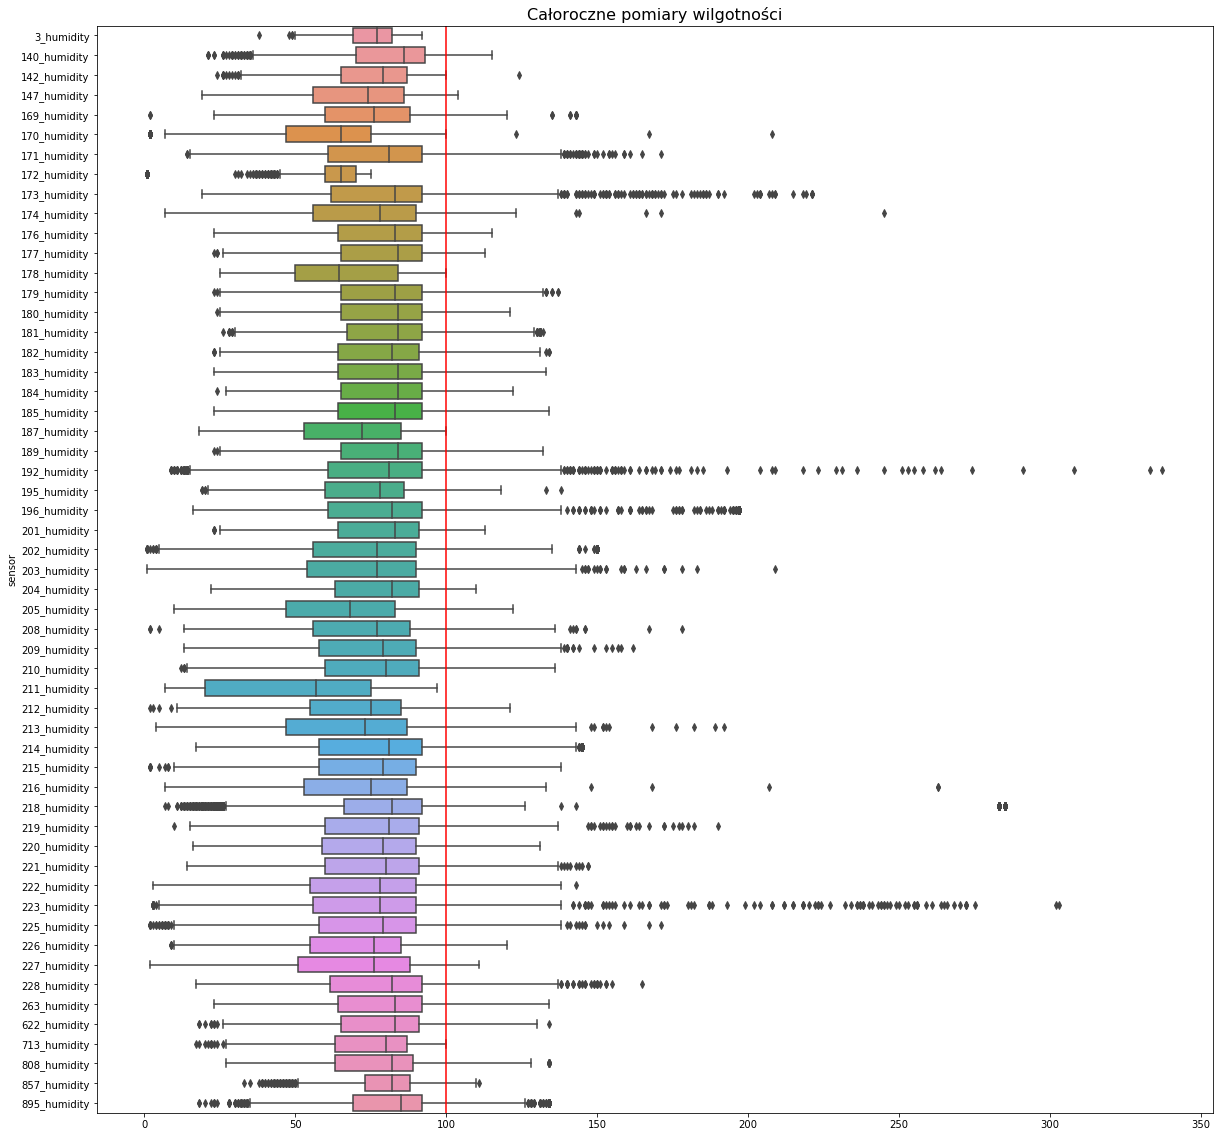

In [28]:
data = year[humi_col].drop(columns = ['194_humidity'])

fig, ax = plt.subplots(figsize=(20, 20))

ax = sns.boxplot(data=data, orient="h")
_ = plt.title("Całoroczne pomiary wilgotności", fontsize=16)
_ = plt.ylabel("sensor")
_ = plt.axvline(100, color="red")
_ = plt.show()

## 2.5 Ciśnienie

Pomiary ciśnienia wyglądają wiarygodnie dla wszystkich czujników.

In [29]:
year[pres_col].describe()

3_pressure   140_pressure   142_pressure   147_pressure  \
count    1178.000000    6683.000000    2041.000000    7940.000000   
mean   101652.880306  101639.084842  101842.108770  101664.201134   
std      1020.704947     653.937345     981.352176     754.000746   
min     99160.000000   98374.000000   99364.000000   98309.000000   
25%    100828.500000  101291.000000  101097.000000  101243.000000   
50%    101726.000000  101666.000000  102003.000000  101661.000000   
75%    102352.000000  102064.000000  102618.000000  102084.000000   
max    103619.000000  103155.000000  103724.000000  103968.000000   

        169_pressure   170_pressure   171_pressure   172_pressure  \
count    8237.000000    8435.000000    8489.000000    8363.000000   
mean   101658.786937  101671.404624  101691.013194  101691.475069   
std       804.643314     777.964840     779.843959     797.149695   
min     98304.000000   98326.000000   98349.000000   98345.000000   
25%    101203.000000  101240.500000  101259.000000  101234.000000   
50%    101656.000000  101699.000000  101710.000000  101696.000000   
75%    102105.000000  102133.500000  102146.000000  102154.500000   
max    104181.000000  103869.000000  103937.000000  104016.000000   

        173_pressure   174_pressure  ...   225_pressure   226_pressure  \
count    8474.000000    7360.000000  ...    8406.000000    8554.000000   
mean   101663.265872  101662.738043  ...  101591.927790  101632.577625   
std       762.572083     792.262339  ...     745.188333     742.311130   
min     98346.000000   98309.000000  ...   98386.000000   98381.000000   
25%    101239.250000  101218.000000  ...  101198.000000  101233.000000   
50%    101697.000000  101669.000000  ...  101654.000000  101671.000000   
75%    102133.000000  102119.000000  ...  102096.000000  102101.750000   
max    103732.000000  103987.000000  ...  103152.000000  103503.000000   

        227_pressure   228_pressure   263_pressure   622_pressure  \
count    4175.000000    8504.000000    8398.000000    5579.000000   
mean   101980.904671  101721.064087  101618.441653  101866.640796   
std       772.361259     750.742034     739.888230     693.095829   
min     99578.000000   98452.000000   98436.000000   98628.000000   
25%    101597.000000  101307.750000  101224.250000  101477.000000   
50%    102018.000000  101756.000000  101685.000000  101891.000000   
75%    102466.500000  102190.000000  102121.000000  102330.000000   
max    104075.000000  103700.000000  103171.000000  103415.000000   

        713_pressure   808_pressure   857_pressure   895_pressure  
count    3031.000000    1147.000000    2653.000000    6337.000000  
mean   101710.759155  101416.014821  101591.979269  101660.566672  
std       771.419980    1035.408223     809.559197     649.831280  
min     98602.000000   98554.000000   98372.000000   98433.000000  
25%    101409.000000  100946.500000  101116.000000  101328.000000  
50%    101794.000000  101627.000000  101614.000000  101686.000000  
75%    102190.000000  102164.500000  102207.000000  102079.000000  
max    103286.000000  103175.000000  103146.000000  103199.000000  

[8 rows x 56 columns]

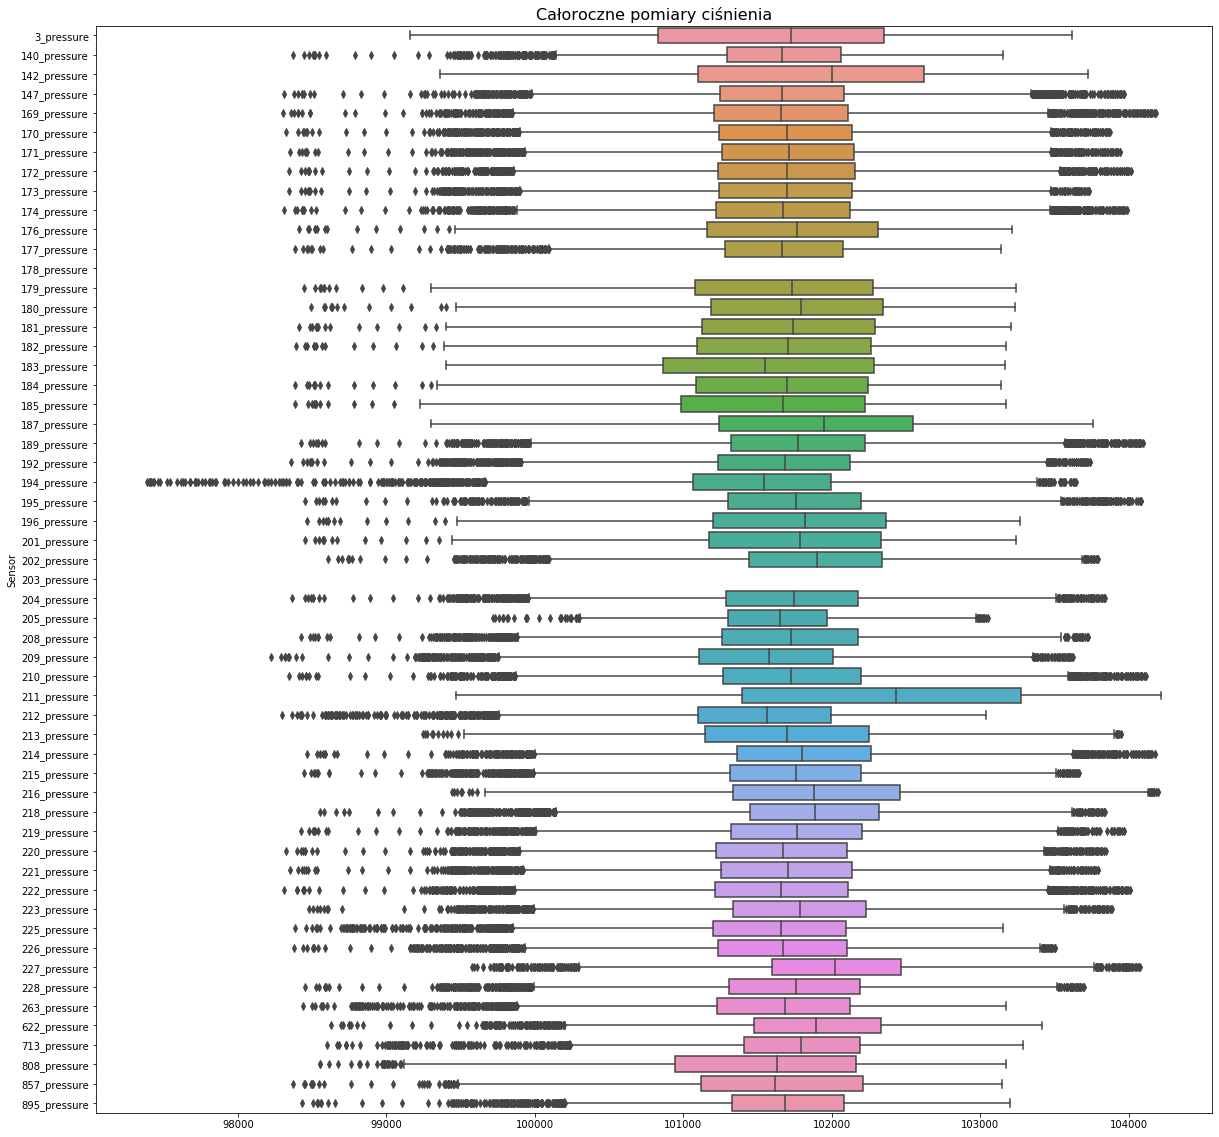

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=year[pres_col], orient="h")
_ = plt.title("Całoroczne pomiary ciśnienia", fontsize=16)
_ = plt.ylabel("Sensor")
_ = plt.show()

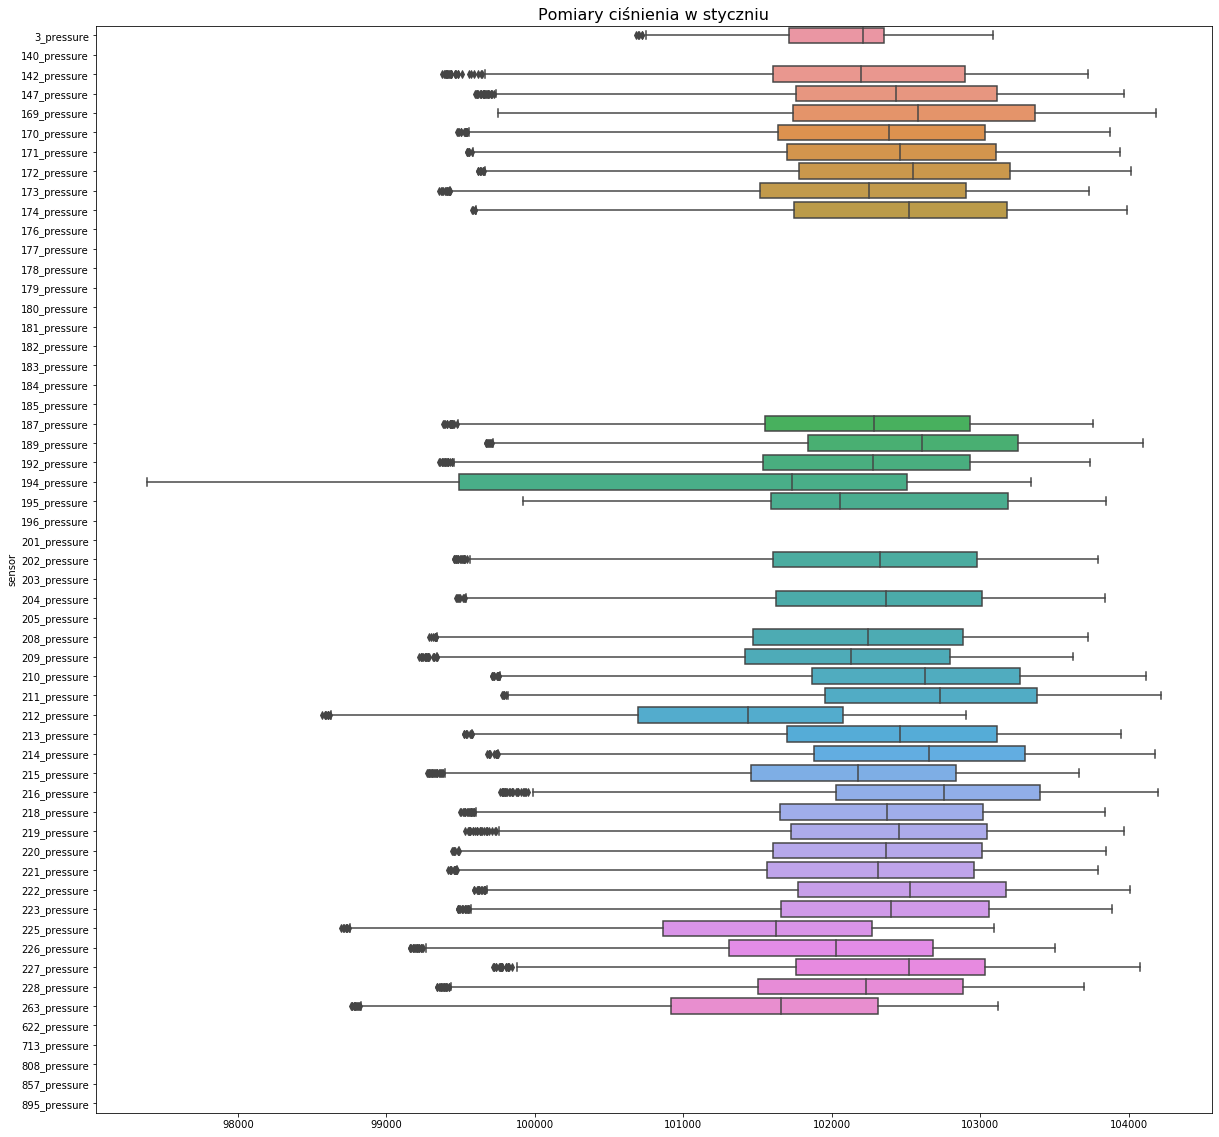

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=jan[pres_col], orient="h")
_ = plt.title("Pomiary ciśnienia w styczniu", fontsize=16)
_ = plt.ylabel("sensor")
_ = plt.show()

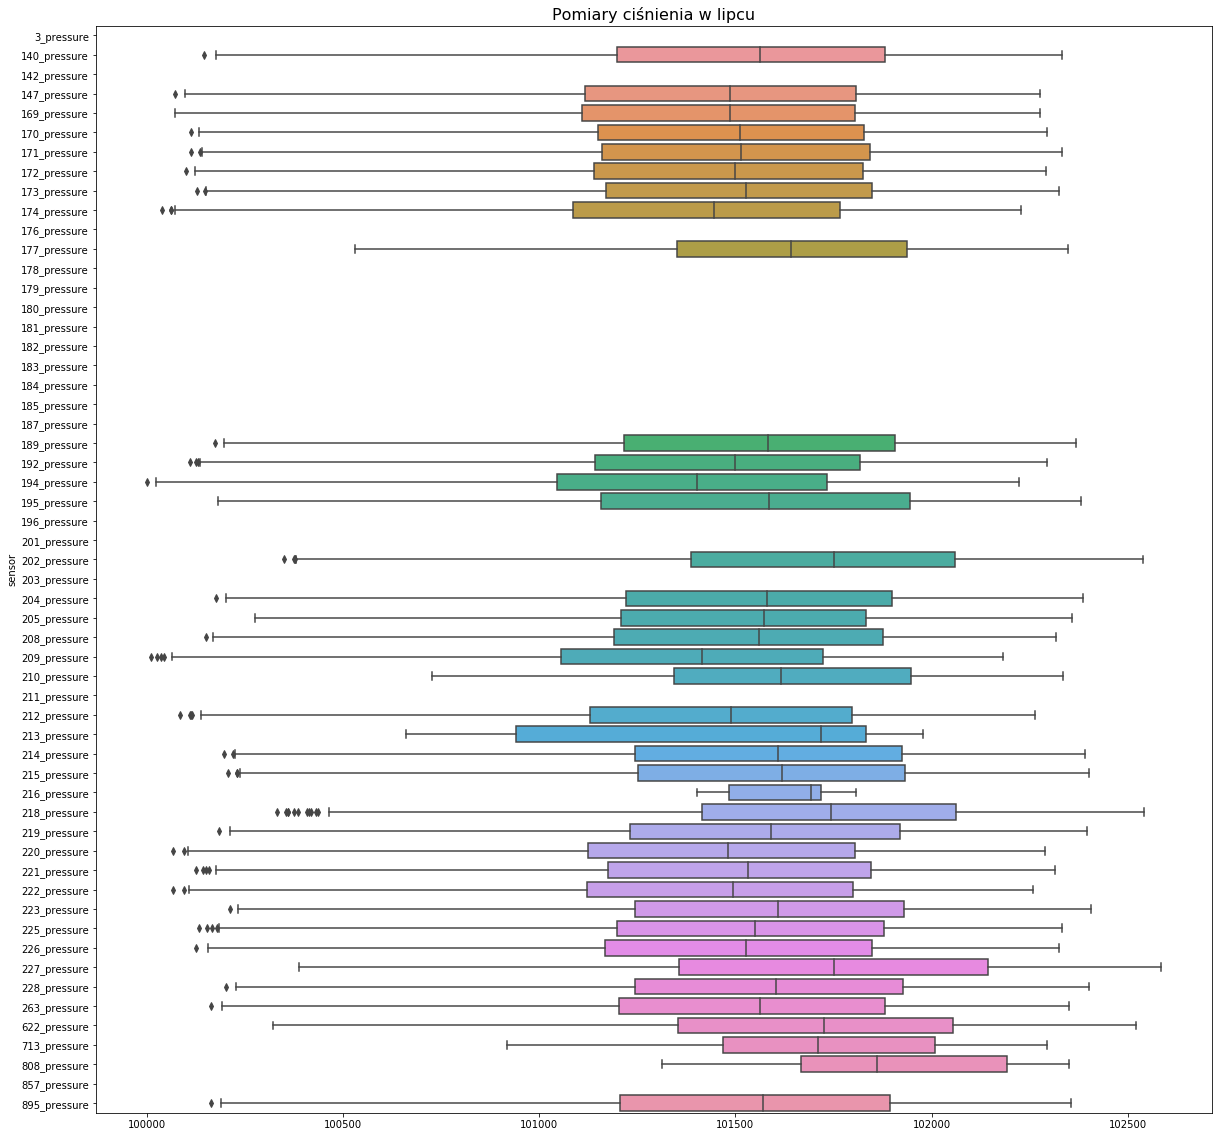

In [32]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=jul[pres_col], orient="h")
_ = plt.title("Pomiary ciśnienia w lipcu", fontsize=16)
_ = plt.ylabel("sensor")
_ = plt.show()

## 2.5 PM10

PM10 jest mieszaniną cząsteczek, których średnica nie przekracza 10 mikrometrów. Według WHO norma średniego, dobowego stężenia tego pyłu wynosi 50 mikrogramów  na metr sześcienny, a roczna 20 mikrogramów na metr sześcienny. Informacja o przekroczonych normach jest ogłaszana w Polsce, gdy dobowe stężenie PM10 wyniesie 200 μg/m3 (przed zmianami w 2019 roku).

Pionową czerwoną linią została oznaczona średnia roczna norma WHO 20 mikrogramów PM10 na metr sześcienny. Niesety jest ona bliska dolnym kwartylom odczytów większości sensorów w ciągu roku. Oznacza to, że w większości przypadków sensory wskazywały przez około 75% czasu w 2017 roku stężenie przekraczające tę normę. Jednak nie wszystkie sensory dokonywały pomiarów przez cały rok.

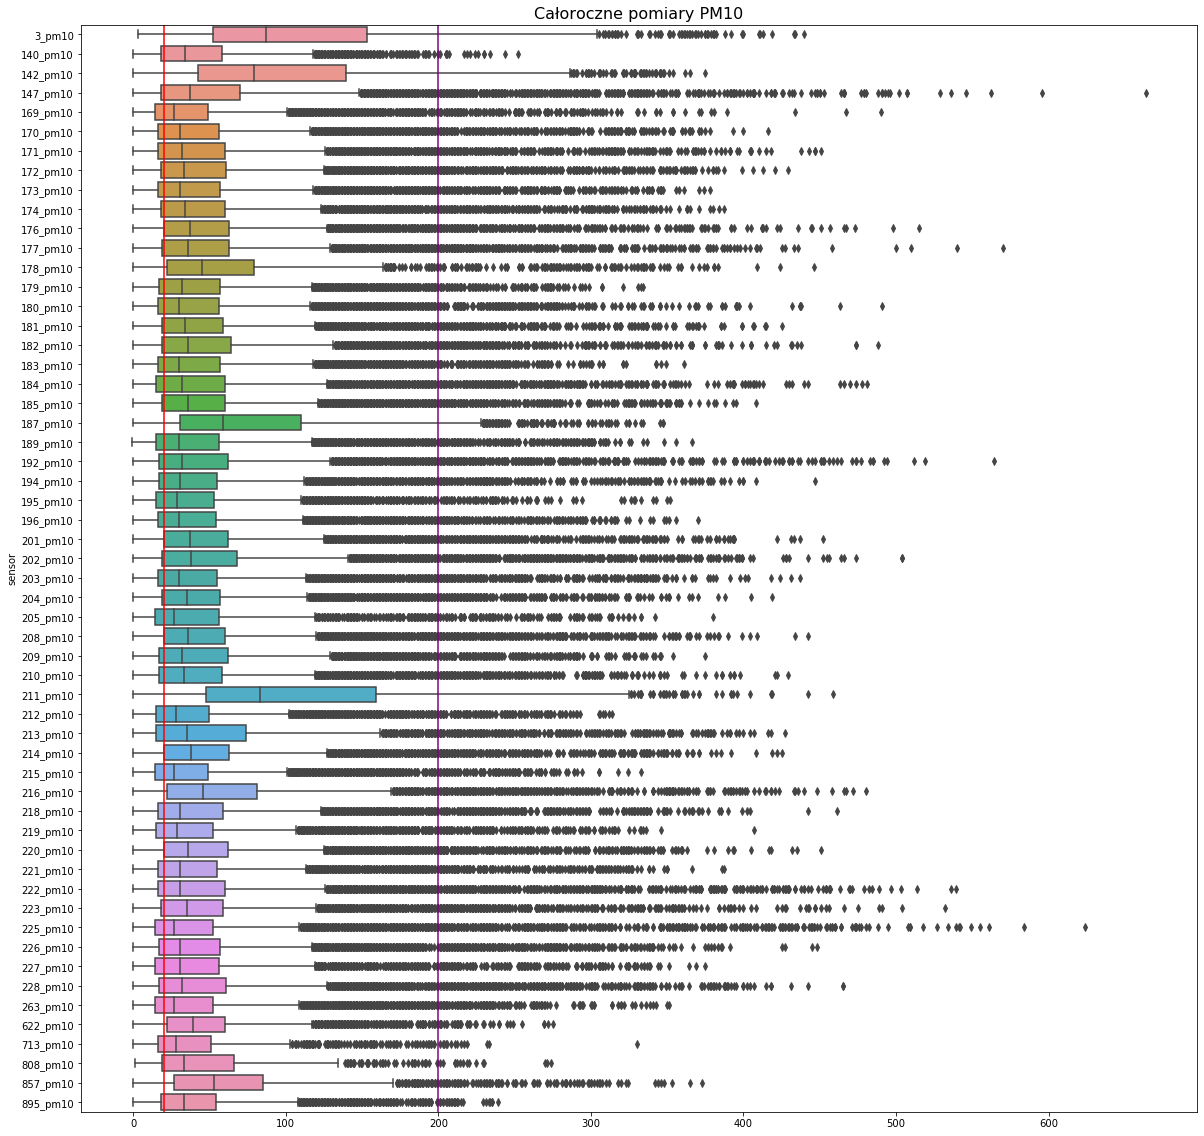

In [33]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=year[pm10_col], orient="h")
_ = plt.title("Całoroczne pomiary PM10", fontsize=16)
_ = plt.axvline(20, color="red")
_ = plt.axvline(200, color="purple")
_ = plt.ylabel("sensor")
_ = plt.show()

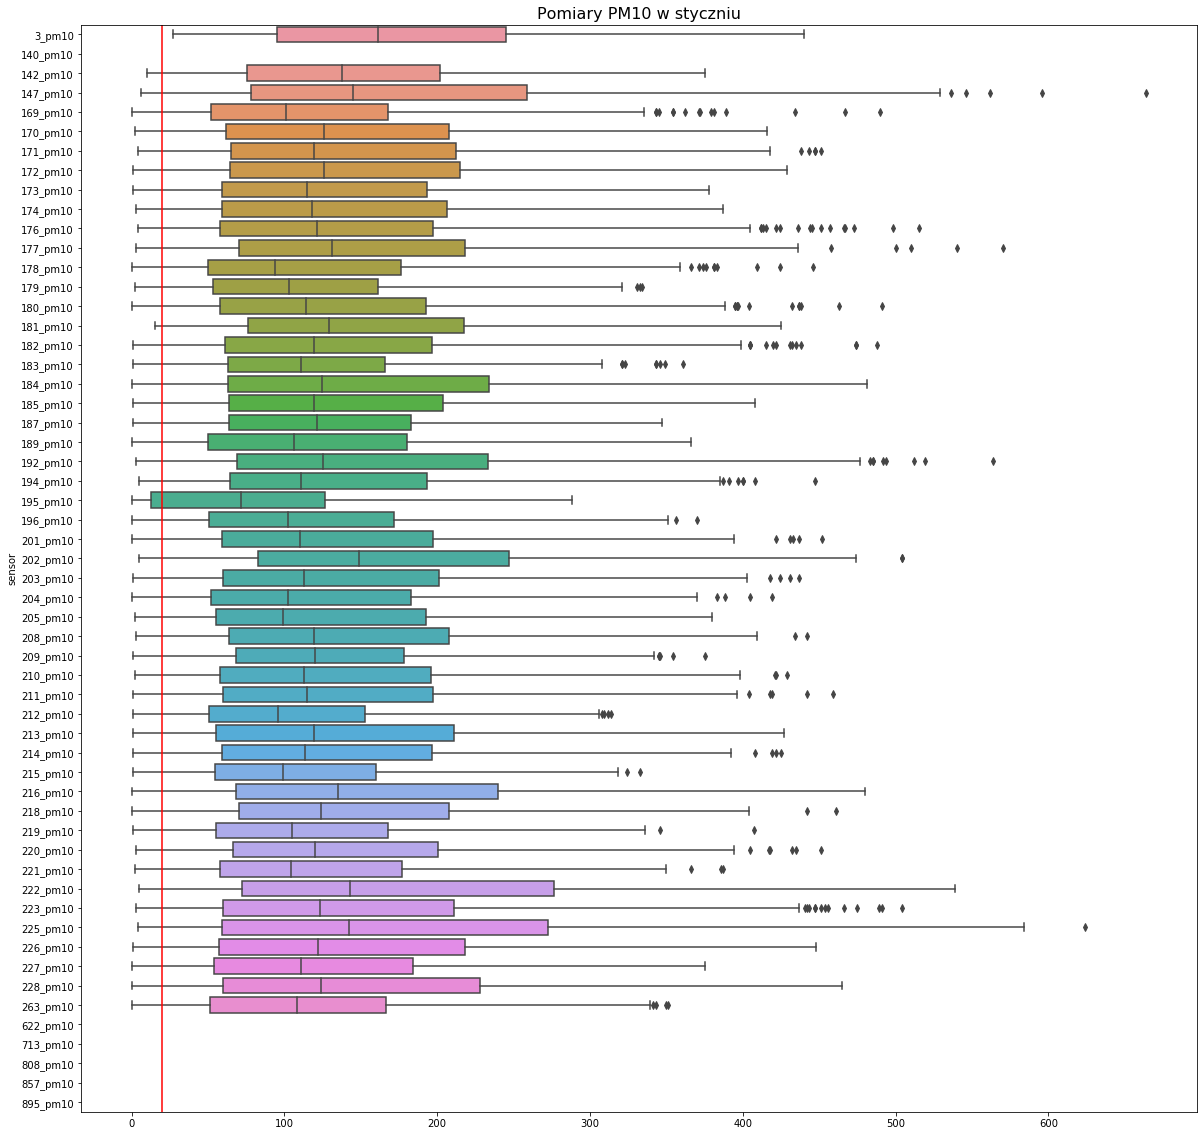

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=jan[pm10_col], orient="h")
_ = plt.title("Pomiary PM10 w styczniu", fontsize=16)
_ = plt.ylabel("sensor")
_ = plt.axvline(20, color="red")
_ = plt.show()

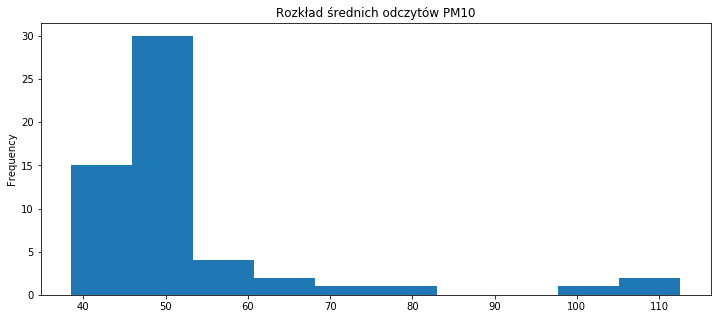

In [35]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = year[pm10_col].mean().plot(kind="hist")
_ = plt.title("Rozkład średnich odczytów PM10")
_ = plt.show()

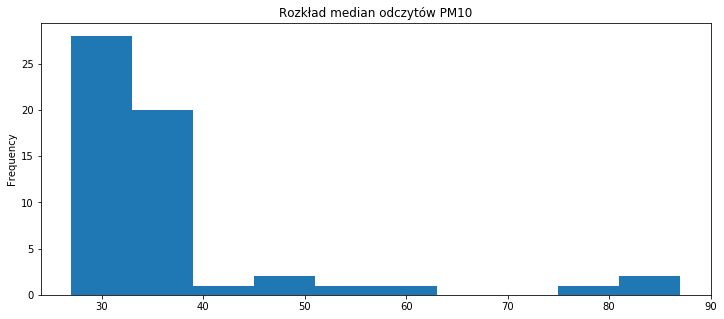

In [36]:
fig, ax = plt.subplots(figsize=(12, 5))
year[pm10_col].median().plot(kind="hist")
_ = plt.title("Rozkład median odczytów PM10")
_ = plt.show()

## 2.6 PM2.5

PM2.5 to aerozole atmosferyczne o średnicy nie jest większa niż 2.5 mikrometra. WHO ustaliło normę średniego dobowego stężenia pyłu zawieszonego PM2.5 na 25 mikrogramów na metr sześcienny, a roczna norma to 10 mikrogramów na metr sześcienny.

Pionową linią czerwoną została oznaczona średnia roczna norma WHO wynosząca 10 mikrogramów PM2.5 na metr sześcienny. Podobnie jak w przypadku PM10, niestety jest ona bliska dolnym kwartylom odczytów większości sensorów.  Oznacza to, że w większości przypadków sensory wskazywały przez około 75% czasu w 2017 roku stężenie przekraczające tę normę. Trzeba jednak zaznaczyć, że nie wszystkie sensory posiadają pomiary dla całego roku.

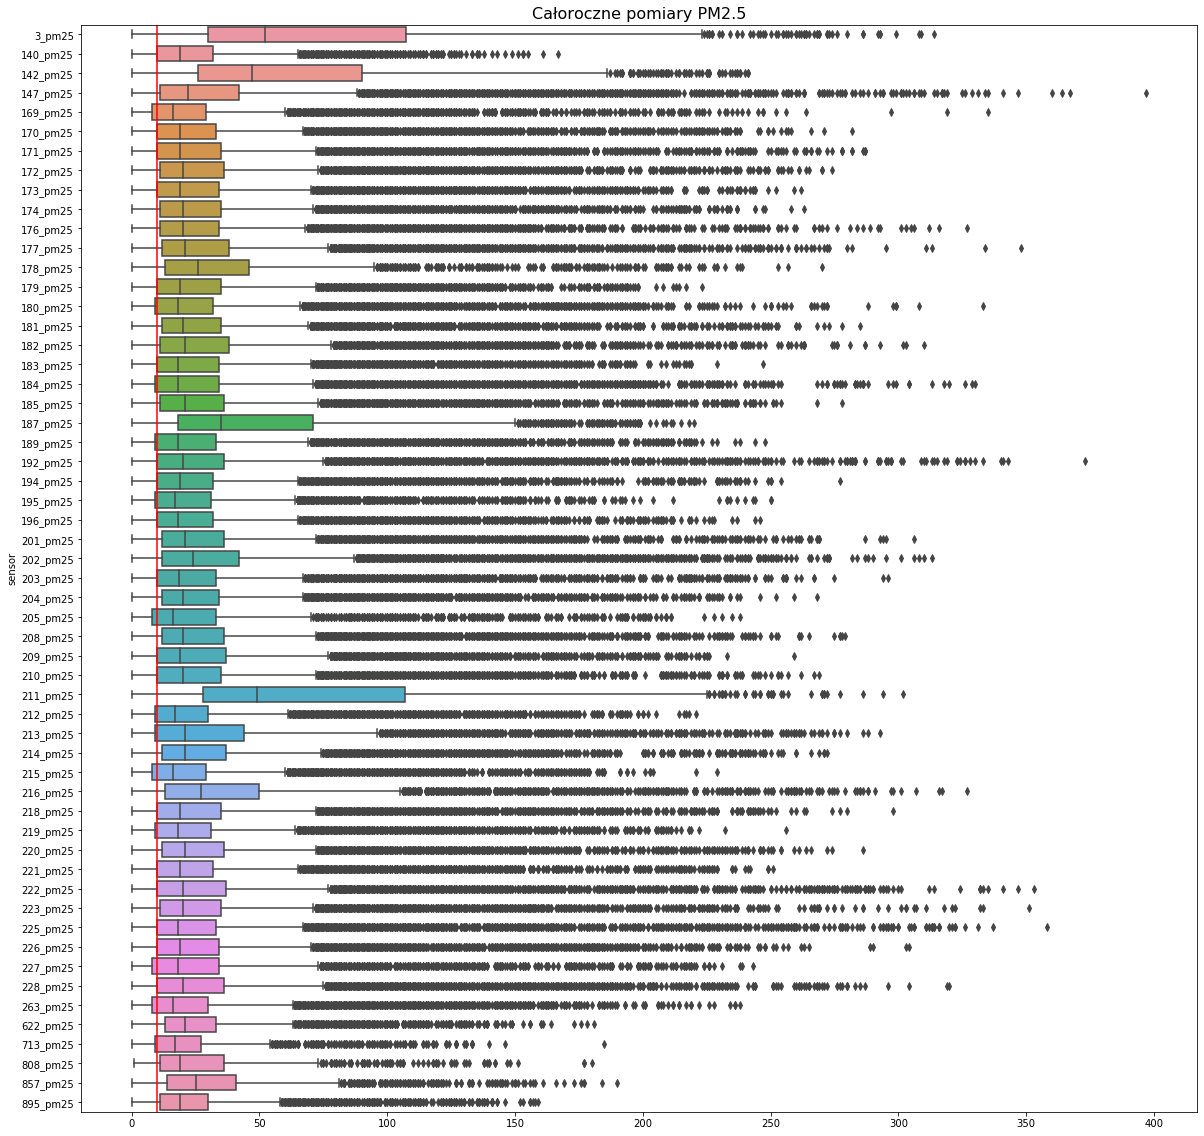

In [37]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=year[pm25_col], orient="h")
_ = plt.title("Całoroczne pomiary PM2.5", fontsize=16)
_ = plt.axvline(10, color="red")
_ = plt.ylabel("sensor")
_ = plt.show()

## 2.7 PM1

PM1 to ultradrobne cząstki o średnicy poniżej 1 mikrometra. 

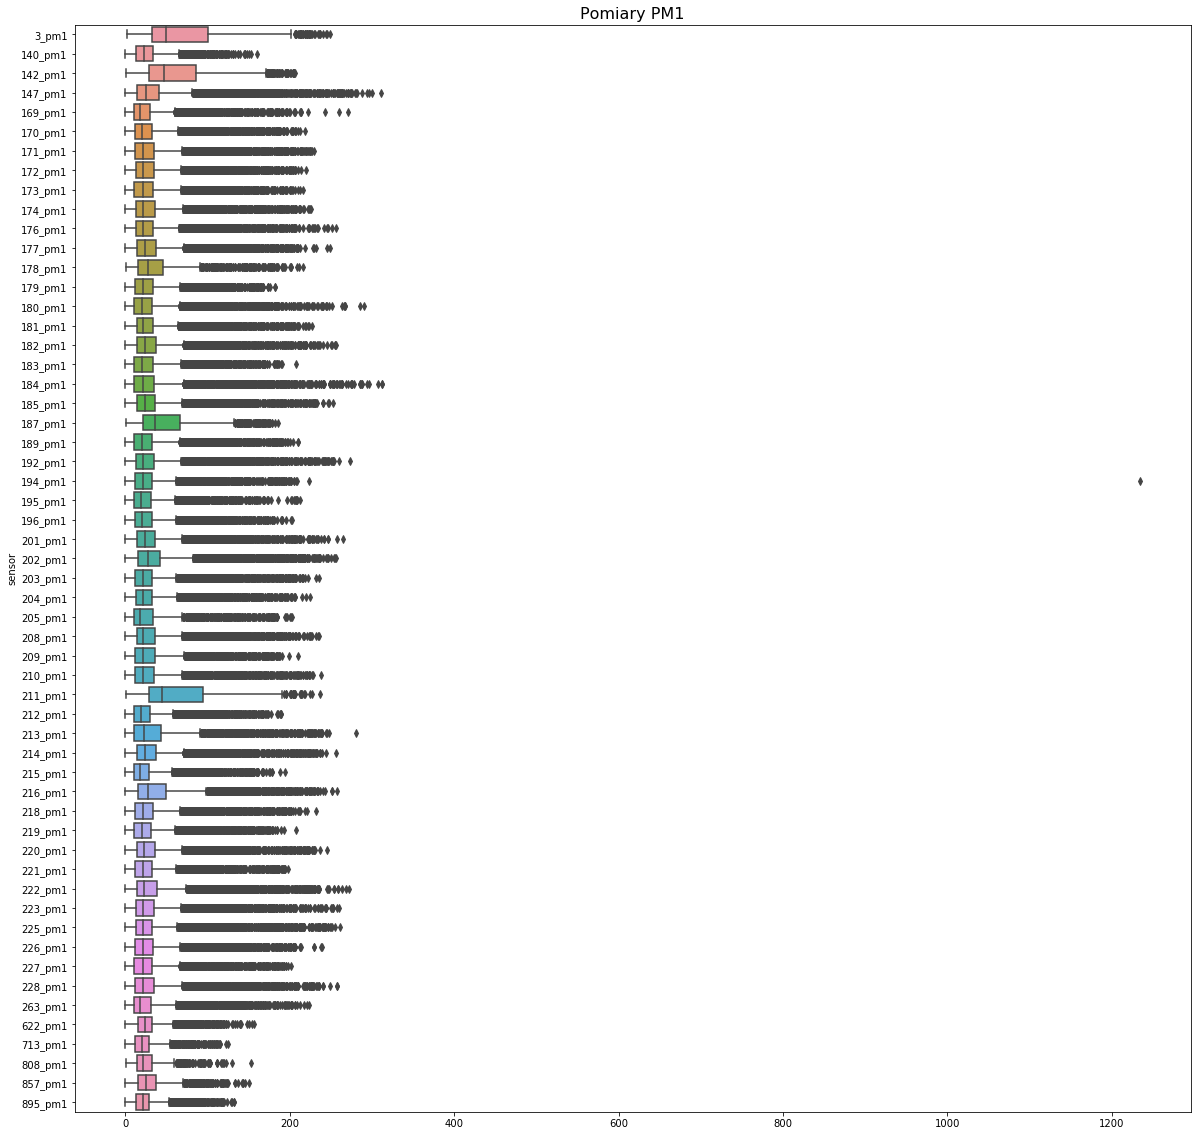

In [38]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.boxplot(data=year[pm1_col], orient="h")
_ = plt.title("Pomiary PM1", fontsize =16)
_ = plt.ylabel("sensor")
_ = plt.show()

Skrajna wartość pm1 dla sensora 194, wynosi 1234. Jest to jedyna taka wartość.

In [39]:
year['194_pm1'].describe(percentiles = [0.25, .5, .75, .99])

count    8331.000000
mean       28.044653
std        30.910504
min         0.000000
25%        12.000000
50%        21.000000
75%        32.000000
99%       152.000000
max      1234.000000
Name: 194_pm1, dtype: float64

In [40]:
col_194 = [col for col in year if "194" in col or col.startswith('UTC time')]
max_pm1 = year[year['194_pm1']==year['194_pm1'].max()]
max_pm1[col_194]

UTC time  194_temperature  194_humidity  194_pressure  \
426  2017-01-18T18:00:00             -2.0           NaN           NaN   

     194_pm1  194_pm25  194_pm10  
426   1234.0       NaN       NaN

In [41]:
year.columns.get_loc('194_pm1')

142

In [42]:
year.iloc[426,year.columns.get_loc('194_pm1')] = year['194_pm1'].median()
year.iloc[426,year.columns.get_loc('194_pm1')]

21.0

In [43]:
#po zmianie
max_pm1 = year[year['194_pm1']==year['194_pm1'].max()]
max_pm1[col_194]

UTC time  194_temperature  194_humidity  194_pressure  \
721  2017-01-31T01:00:00             -7.0          68.0      101791.0   

     194_pm1  194_pm25  194_pm10  
721    224.0     277.0     447.0

In [44]:
year['194_pm1'].describe(percentiles = [0.25, .5, .75, .99])

count    8331.000000
mean       27.899052
std        27.943778
min         0.000000
25%        12.000000
50%        21.000000
75%        32.000000
99%       151.700000
max       224.000000
Name: 194_pm1, dtype: float64

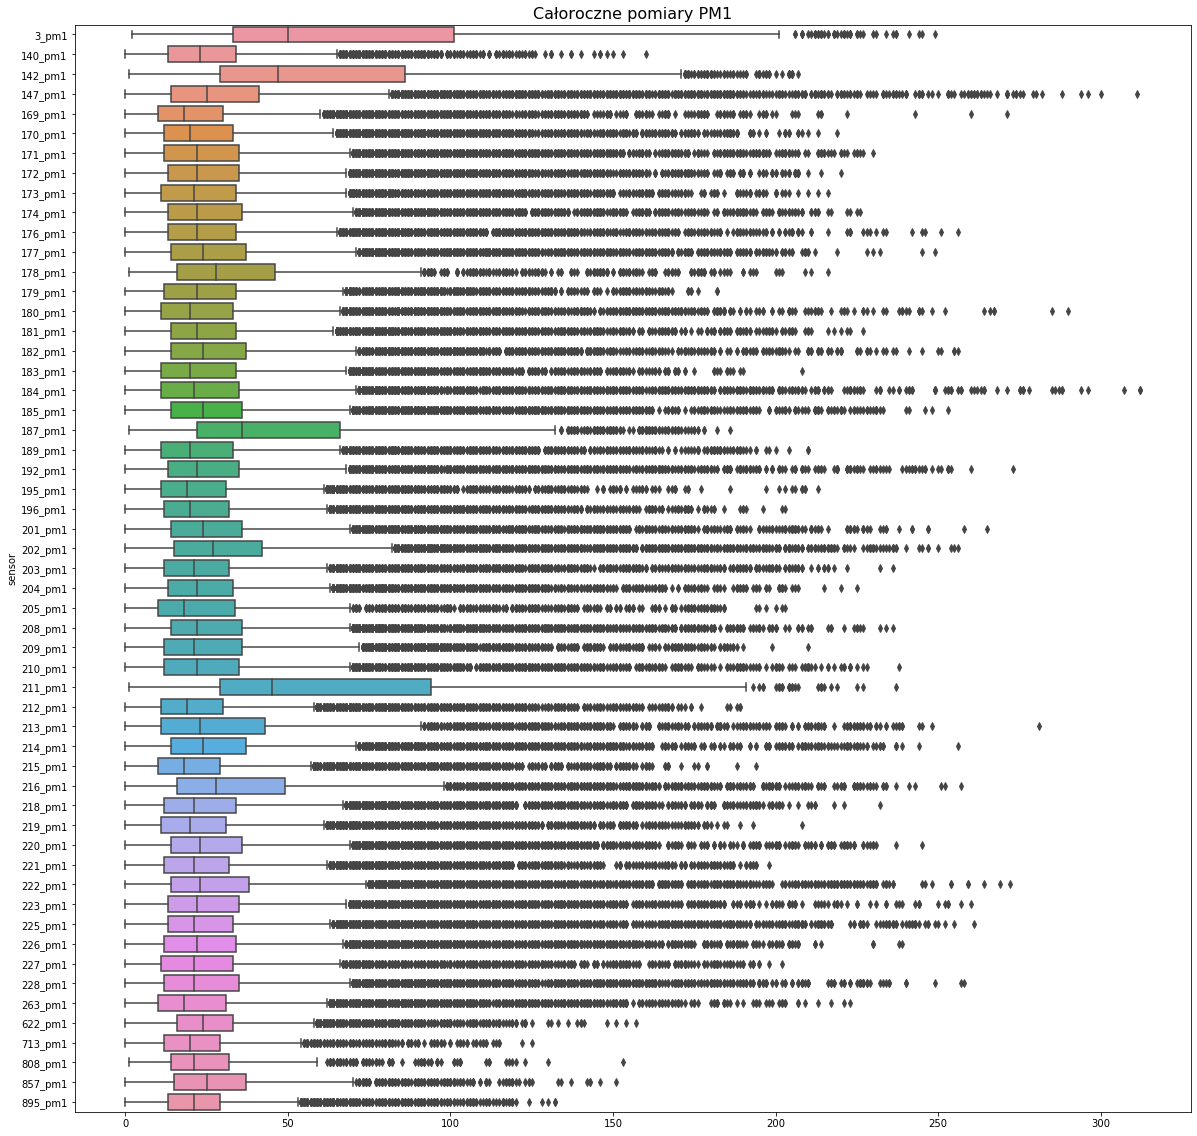

In [45]:
data=year[pm1_col].drop(columns =['194_pm1'])

fig, ax = plt.subplots(figsize=(20, 20))

ax = sns.boxplot(data=data, orient="h")
_ = plt.title("Całoroczne pomiary PM1", fontsize=16)
_ = plt.ylabel("sensor")
_ = plt.show()

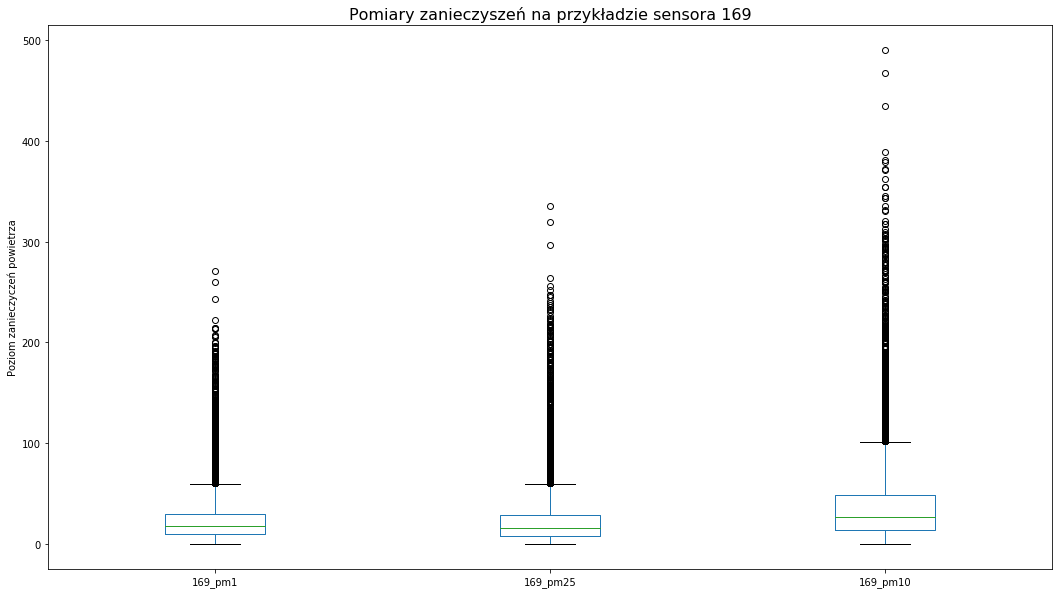

In [46]:
sensor_num = "169"
df_sensor_col = [col for col in jan if col.startswith("169"+'_') or col.startswith('UTC')]
df_sensor = year[df_sensor_col]
ax = df_sensor[['169_pm1','169_pm25','169_pm10']].plot(kind="box", figsize =(18,10))
_ = ax.set_ylabel("Poziom zanieczyczeń powietrza")
_ = plt.title("Pomiary zanieczyszeń na przykładzie sensora 169", fontsize=16)
_ = plt.show()

# 3 Korelacja

W celu zbadania korelacji pomiędzy zmiennymi posłużono się odczytami z sensora 169. Odfiltorowano obserwacje, dla k†órych ten sensor odczytał wilgotność powyżej 100, gdyż najprawdopodobniej wartości te są nieprawidłowe.

In [47]:
year_filtered = year[year['169_humidity']<=100]

In [48]:
corr_p_169 =year_filtered[[
 'UTC time',
 '169_temperature',
 '169_humidity',
 '169_pressure',
 '169_pm1',
 '169_pm25',
 '169_pm10']].corr(method='pearson')
corr_p_169

169_temperature  169_humidity  169_pressure   169_pm1  \
169_temperature         1.000000     -0.074722     -0.188981 -0.458208   
169_humidity           -0.074722      1.000000      0.001113  0.091677   
169_pressure           -0.188981      0.001113      1.000000  0.373470   
169_pm1                -0.458208      0.091677      0.373470  1.000000   
169_pm25               -0.446598      0.082979      0.364475  0.996519   
169_pm10               -0.466938      0.063926      0.379782  0.992238   

                 169_pm25  169_pm10  
169_temperature -0.446598 -0.466938  
169_humidity     0.082979  0.063926  
169_pressure     0.364475  0.379782  
169_pm1          0.996519  0.992238  
169_pm25         1.000000  0.994375  
169_pm10         0.994375  1.000000

Poziom zanieczyczeń powietrza PM10, PM2.5 i PM1 jest bardzo silnie dodatnio skorelowany pomiędzy sobą (korelacja blisko 1). Oznacza to w praktyce, że gdy poziom jednego z nich jest wysoki to najprawopdobniej pozostałe dwa znajdują się również na wysokich poziomach.

Istnieje umiarkowana negatywna korelacja (wahająca się pomiędzy -0.46 a -0.47) dla poszczególnych zanieczyczeń i  temperatury. Z reguły spadkowi temperatury towarzyszy wzrost zanieczyczeń powietrza,a gdy wzrosta temperatura  poparawia się jakość powietrza.

Nieco słabsza, ale uznawana również za umiarkowaną korelację jest dodatnia korelacja pomiędzy PM10, PM2.5 i PM1 powietrza, a ciśnieniem (odpowiednio 0.38, 0.36 i 0.37). Odczytom z wyższym ciśnieniem z reguły towarzyszą wyższe wskazania zanieczyczeń.

Wilgotność powietrza jest bardzo słabo skorelowana z pozostałymi zmiennymi.


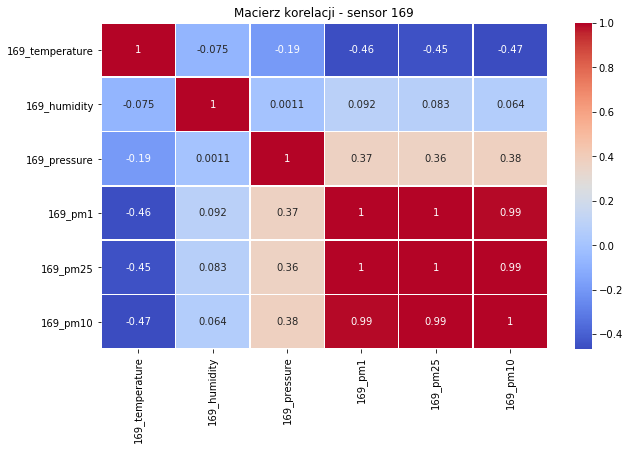

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.heatmap(corr_p_169, annot=True, cmap="coolwarm", linewidth=0.5)
_ = plt.title("Macierz korelacji - sensor 169")
_ = plt.show()

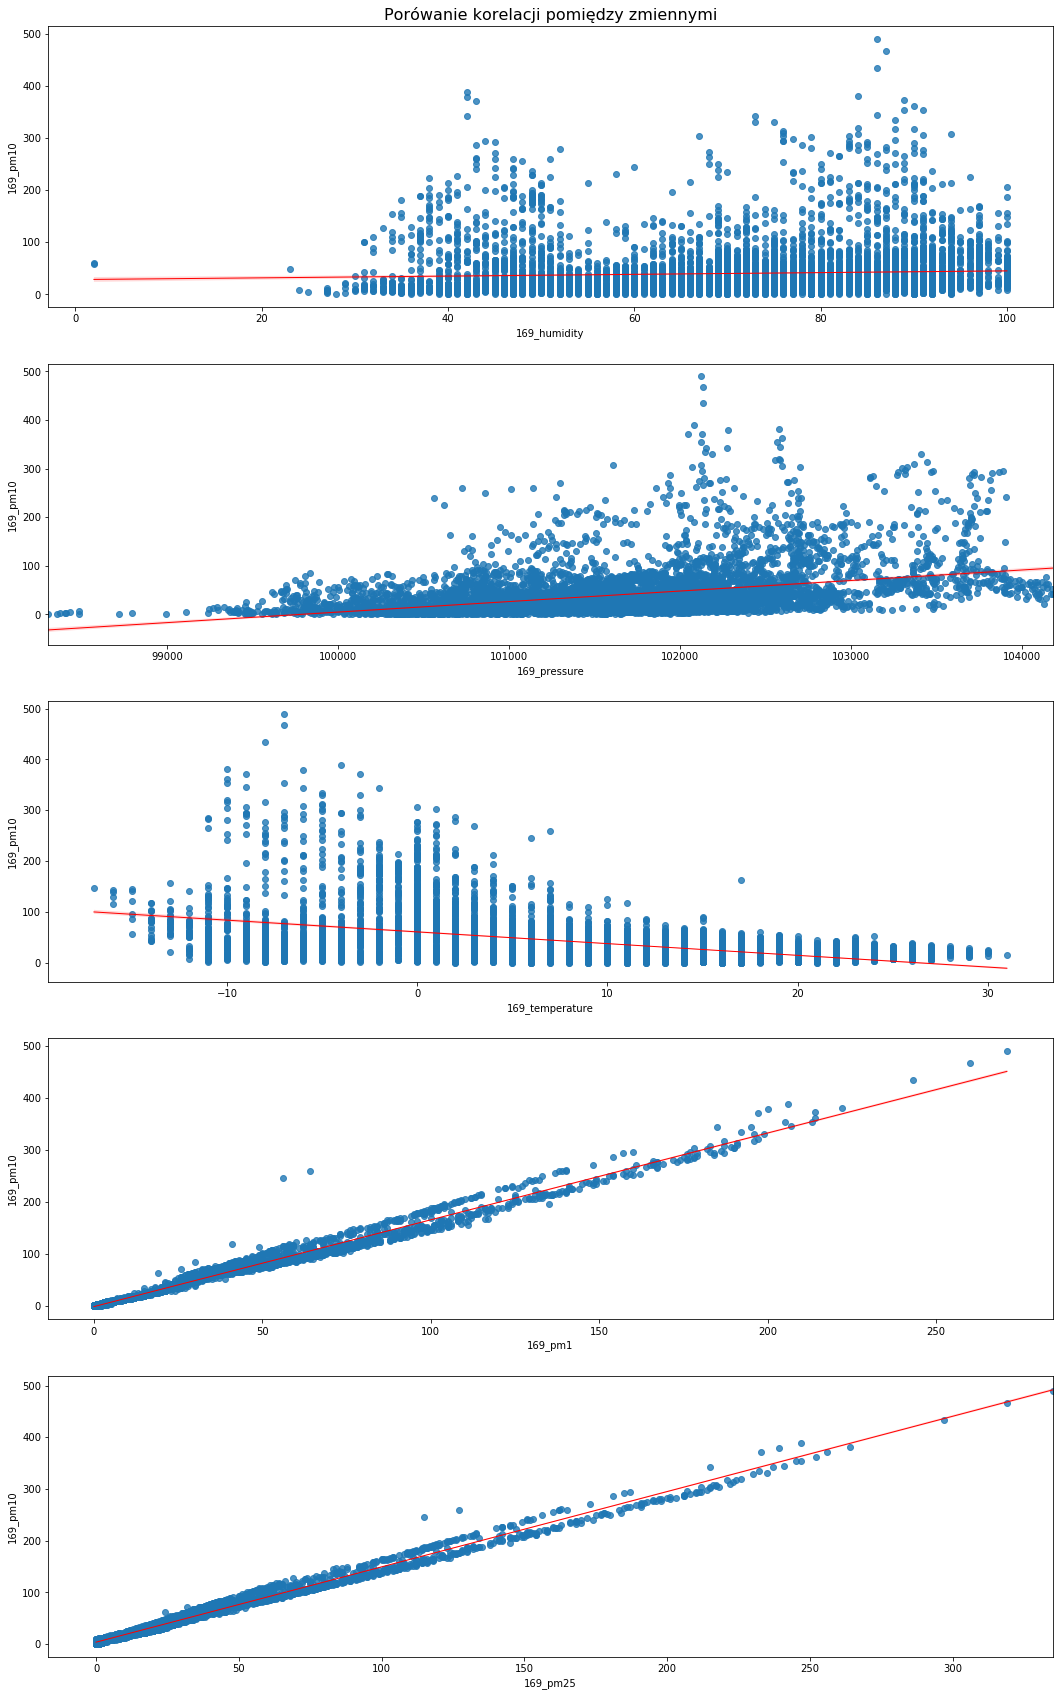

In [50]:
fig = plt.figure(figsize=(18, 30)) 

ax1 = plt.subplot(5,1,1)
_ = plt.title("Porówanie korelacji pomiędzy zmiennymi", fontsize=16)
ax1 = sns.regplot(x=year_filtered["169_humidity"], y=year_filtered["169_pm10"], line_kws={"color":"r","lw":1})
ax2 = plt.subplot(5,1,2)
ax2 = sns.regplot(x=year_filtered["169_pressure"], y=year_filtered["169_pm10"], line_kws={"color":"r","lw":1})
ax3 = plt.subplot(5,1,3)
ax3 = sns.regplot(x=year_filtered["169_temperature"], y=year_filtered["169_pm10"], line_kws={"color":"r","lw":1})
ax4 = plt.subplot(5,1,4)
ax3 = sns.regplot(x=year_filtered["169_pm1"], y=year_filtered["169_pm10"], line_kws={"color":"r","lw":1})
ax5 = plt.subplot(5,1,5)
ax5 = sns.regplot(x=year_filtered["169_pm25"], y=year_filtered["169_pm10"], line_kws={"color":"r","lw":1})
_ = plt.show()

# 4 Analiza

Analizie zostały poddane tylko obserwacje PM10. Z uwagi na wysoką korelację (bliską 1), poziomy PM2.5 oraz PM1 będą spadać bądź rosnąc analogicznie do poziomów PM10.

## 4.1 Kiedy normy WHO są przekraczane?

W celu przeanalizowania przekroczenia dobowej normy WHO (PM10 > 50 mikrogramów/m3) posłużono się średnią ruchomą, która w tym konkretnym przypadku uśrednia odczyt z ostatnich 24 godzin.

Analizując roczny wykres dla dobowej średniej PM10 można zaoobserwować, że powietrze było najbardziej zanieczyczone na początku i pod koniec roku 2017. Odczyty w miesiącach letnich mieściły się poniżej normy WHO.

Należy również zauważyć, że obecnie poziom alarmowy dla Polski został zmniejszony do PM10 > 150 mikrogramów/m3. Natomiast poziom informacyjny odpowiednio do PM10 > 100 mikrogramów/m3. Wobec tego okres alarmowy zanieczyszczenia powietrza występowałby częściej, gdyby przyjąć normy przyjęte w 2019 roku.

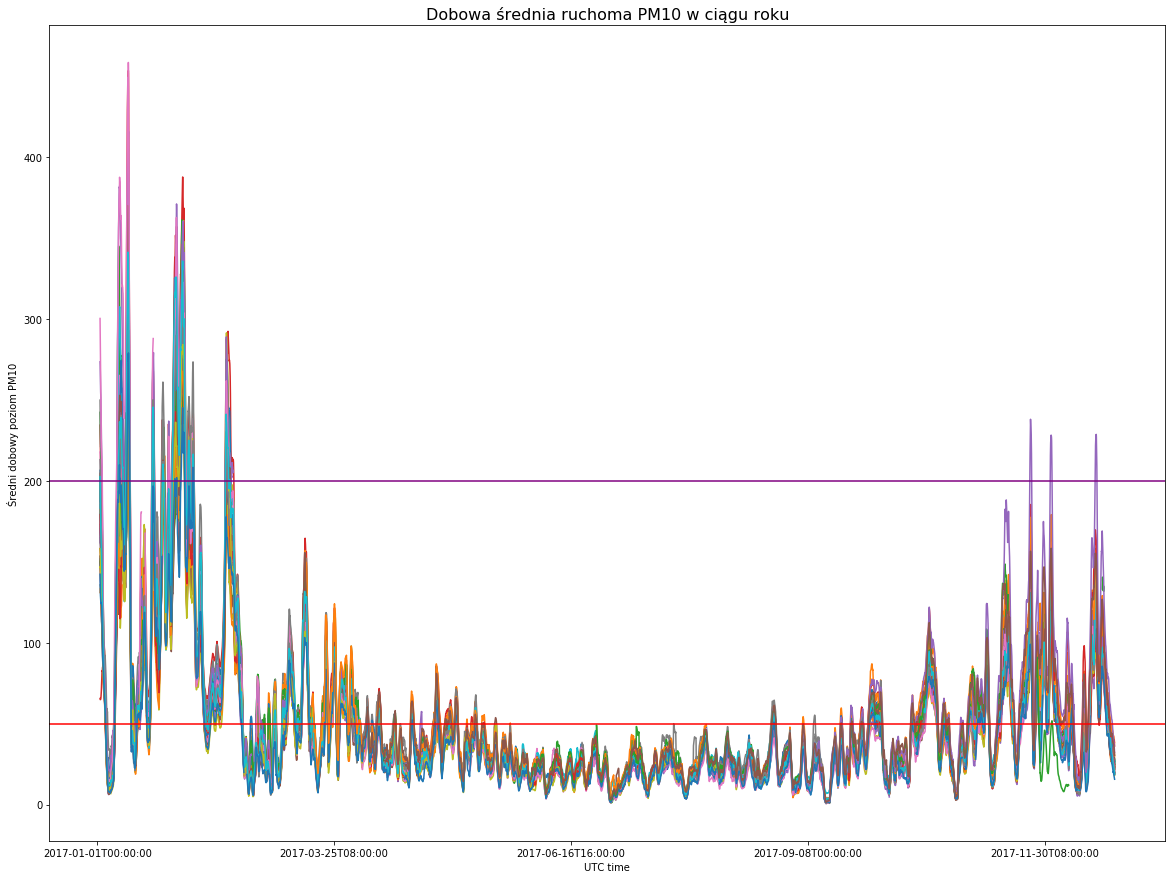

In [51]:
year_pm10 = year[pm10_col].set_index('UTC time')
moving_average_year = year_pm10.rolling(window=24).mean()

ax = moving_average_year.plot(figsize =(20,15), legend=None)
_ = ax.set_xlabel("UTC time")
_ = plt.title("Dobowa średnia ruchoma PM10 w ciągu roku", fontsize =16)
_ = ax.set_ylabel("Średni dobowy poziom PM10")

ax = plt.axhline(50, label = 'Norma WHO', color="red")
ax = plt.axhline(200, label="Informacja o przekroczonych normach", color="purple")
_ = plt.show()

W celu bliższego przyjrzenienia się średnim odczytom zestawiono miesiąc w sezonie grzewczym (luty) z miesiącem poza sezonem grzewczym (lipiec). Stan alarmowy obowiązywał w pierwszych dniach lutego oraz w połowie miesiąca.

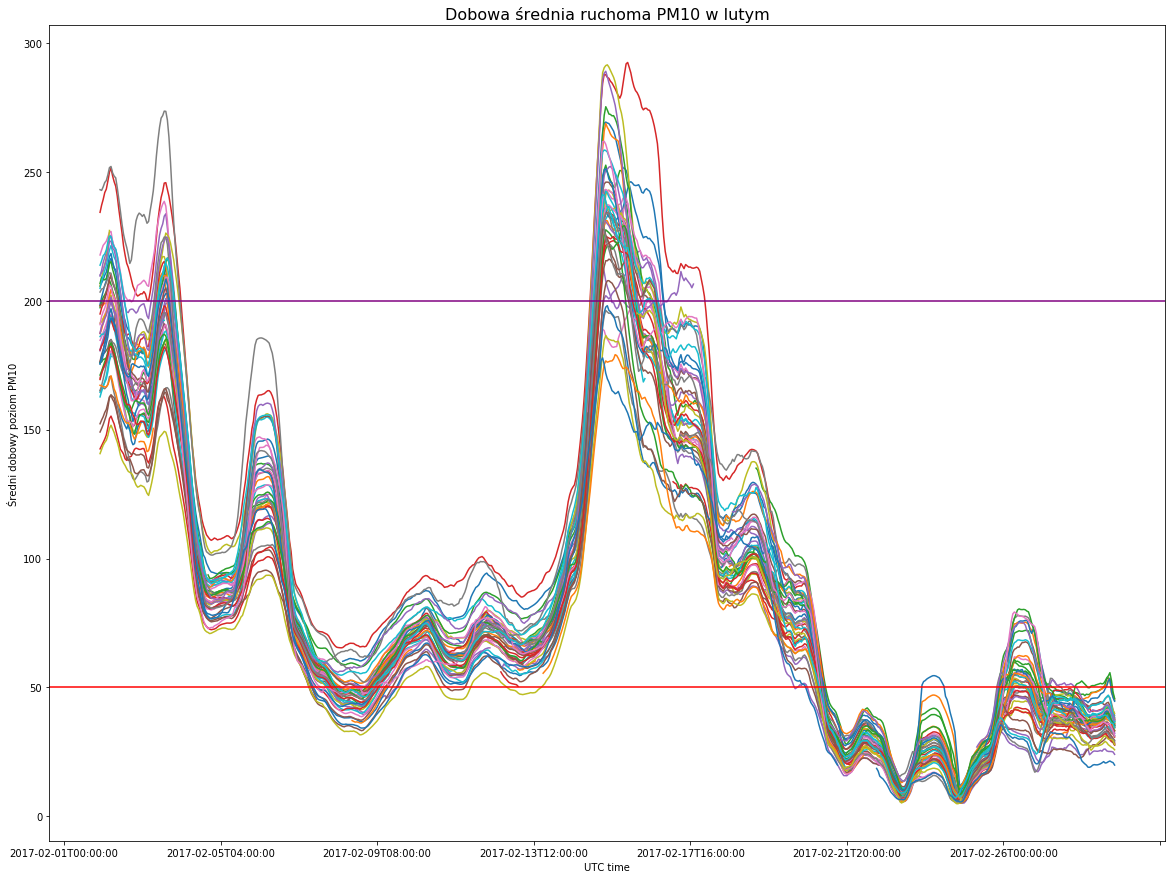

In [52]:
feb_pm10 = feb[pm10_col].set_index('UTC time')
moving_average_feb = feb_pm10.rolling(window=24).mean()

ax = moving_average_feb.plot(figsize =(20,15), legend=None)
ax.set_xlabel("UTC time")
_ = plt.title("Dobowa średnia ruchoma PM10 w lutym", fontsize =16)
ax.set_ylabel("Średni dobowy poziom PM10")

ax = plt.axhline(50, label = 'Norma WHO', color="red")
ax = plt.axhline(200, label="Informacja o przekroczonych normach", color="purple")
_ = plt.show()

Natomiast w lipcu żaden z sesnorów nie wskazywał odczytów zbiżajacych się do stanu alarmowego. Co więcej wszystkie uśrednione odczyty znajdowały się poniżej normy WHO. Wskazuje to na fakt, że problem z zanieczyszczniem pwoietrza istnieje w Krakowie w sezonie grzewczym.

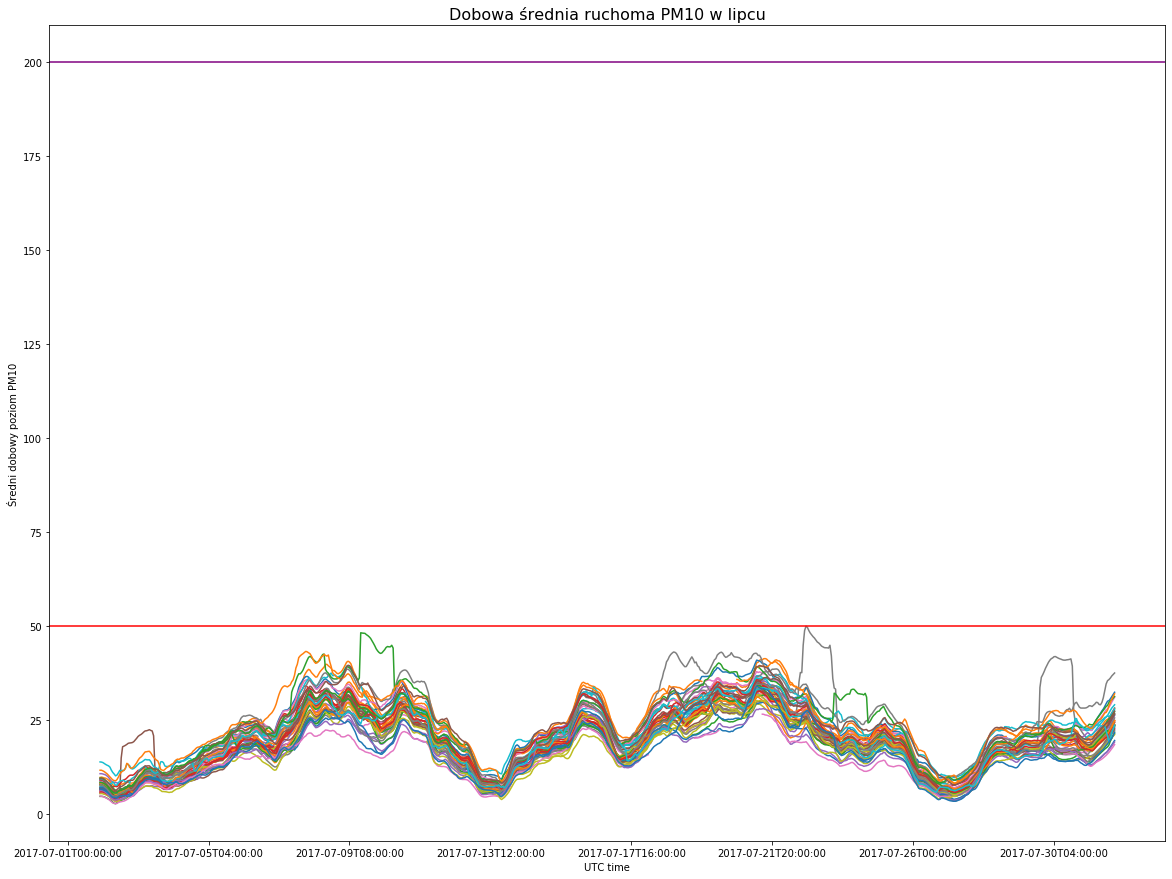

In [53]:
jul_pm10 = jul[pm10_col].set_index('UTC time')
moving_average_jul = jul_pm10.rolling(window=24).mean()

ax = moving_average_jul.plot(figsize =(20,15), legend=None)
ax.set_xlabel("UTC time")
_ = plt.title("Dobowa średnia ruchoma PM10 w lipcu", fontsize=16)
ax.set_ylabel("Średni dobowy poziom PM10")

ax = plt.axhline(50, label = 'Norma WHO', color="red")
ax = plt.axhline(200, label="Informacja o przekroczonych normach", color="purple")
_ = plt.show()

Analizując odczyty sensorów można dostrzec, że obserwowane wartości wahają się w ciągu doby. Zależność tę dobrze ilustruje poniższy wykres.

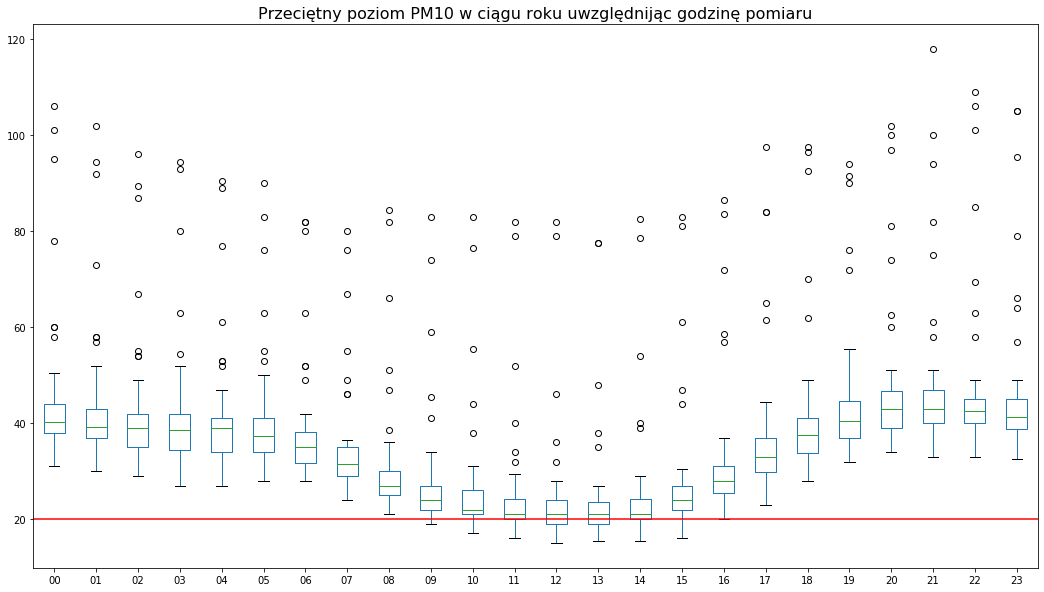

In [54]:
time_year_pm10 = year_pm10
time_year_pm10["UTC time"] = pd.to_datetime(year_pm10.index)
time_year_pm10["Hour"] = time_year_pm10["UTC time"].dt.strftime("%H")
time_year_pm10.groupby('Hour').median().T.plot(kind="box", figsize =(18,10))
_ = plt.title("Przeciętny poziom PM10 w ciągu roku uwzględnijąc godzinę pomiaru", fontsize=16)
ax = plt.axhline(20, label = 'Roczna norma WHO', color="red")
plt.show()

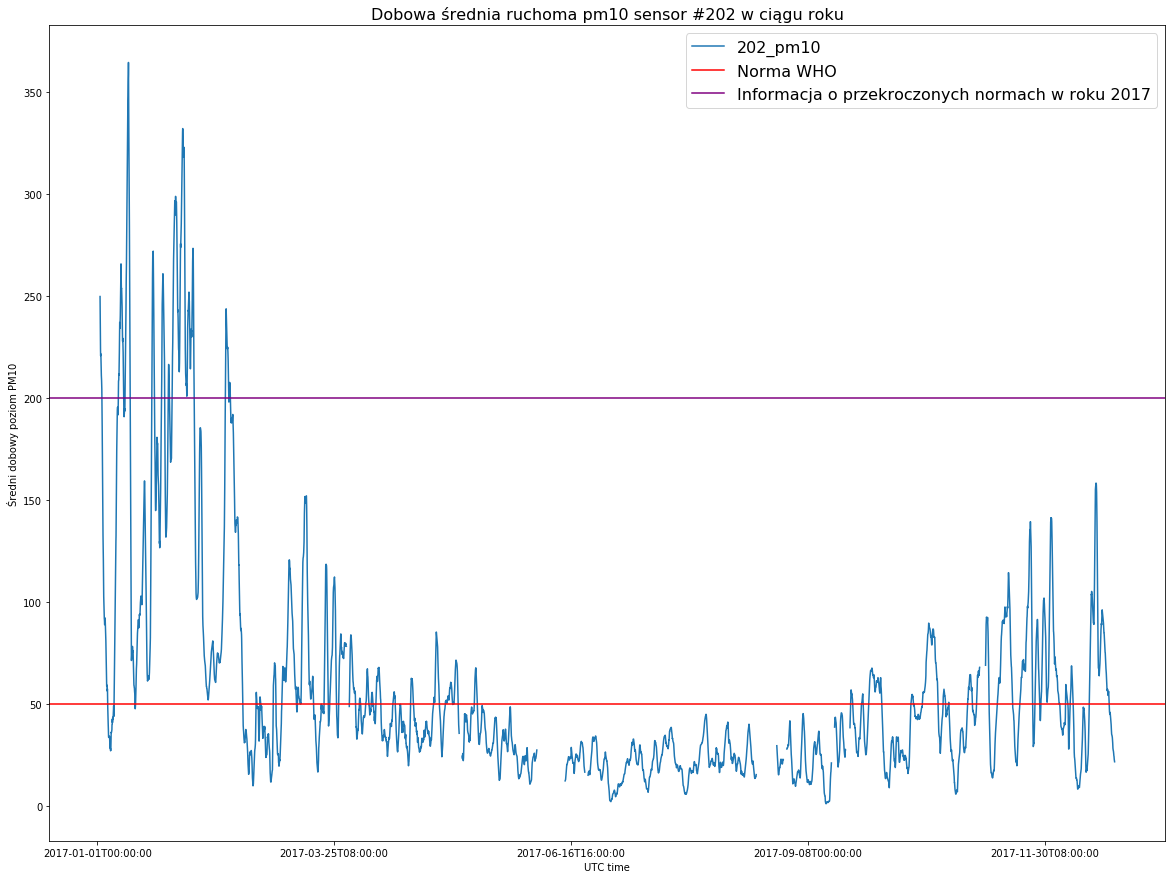

In [55]:
year_pm10_s142 = year[['UTC time','202_pm10']].set_index('UTC time')
moving_average_year = year_pm10_s142.rolling(window=24).mean()

ax = moving_average_year.plot(figsize =(20,15))
ax.set_xlabel("UTC time")
_ = plt.title("Dobowa średnia ruchoma pm10 sensor #202 w ciągu roku", fontsize =16)
ax.set_ylabel("Średni dobowy poziom PM10")
ax = plt.axhline(50, label = 'Norma WHO', color="red")
ax = plt.axhline(200, label="Informacja o przekroczonych normach w roku 2017", color="purple")
plt.legend(fontsize=16)
plt.show()

## 4.1  Kiedy powietrze jest najbardziej zanieczyszczone?

Poniżej dokonano prówniania stanu powietrza w ciągu doby, zestwiając miesiące typowo letnie z zimowymi.

###  4.1.1 Miesiące poza sezonem grzewczym

Średnia wartość PM10 odnotowana w lipcu przez każdy z sensorów ani razu nie przekroczyła normy WHO. Co szczególnie interesujące poziom PM10 w ciągu dnia jest zauważalnie niższy niż w godzinach wieczornych i nocnych. 

Mniej więcej od godziny 16 do godziny 20 zanieczyszczenia PM10 rosną, by nastepnie utrzymać się na poziomie około dwa razy wyższym niż ciągu dnia. Poprawa stanu powietrza rozpoczyna się około 4 rano. Poziom PM10 obniża się do około 9 rano.

In [56]:
jul = pd.read_csv(all_file_names[5])
jul["UTC time"] = pd.to_datetime(jul['UTC time'])
jul_col_pm10 = [col for col in jul.columns if "pm10" in col or "UTC time" in col ]
jul_pm10 = jul[jul_col_pm10]
jul["UTC time"] = jul["UTC time"].dt.strftime("%H")
jul_pm10_means =jul[jul_col_pm10].groupby("UTC time").mean()

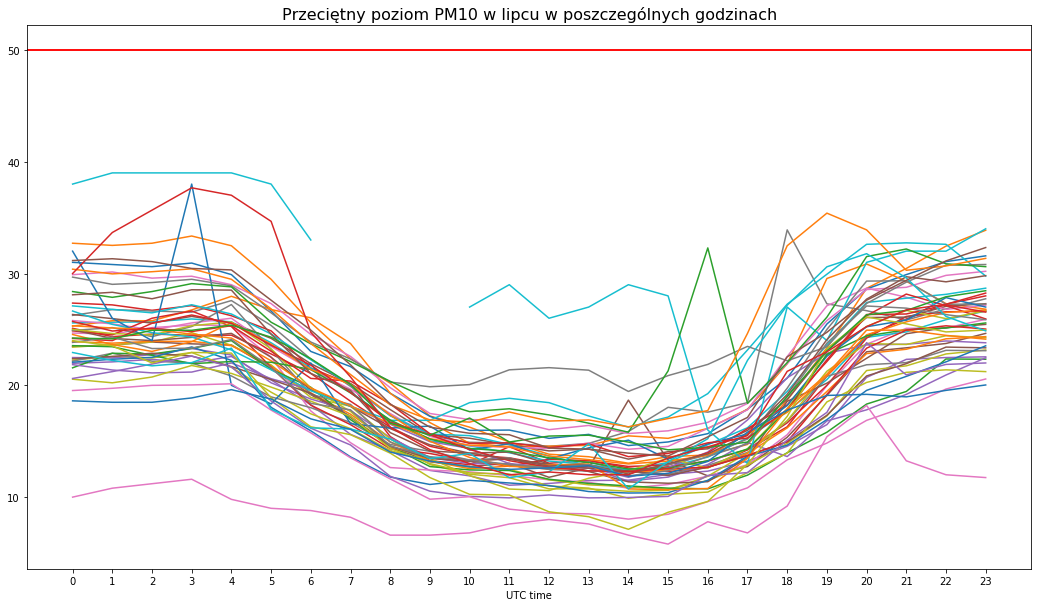

In [57]:
plt.figure(figsize=(18,10))
for col in jul_pm10_means.columns:
    jul_pm10_means[col].plot()
_ = plt.axhline(50, label = 'norma WHO', color="red")
_ = plt.title("Przeciętny poziom PM10 w lipcu w poszczególnych godzinach",fontsize=16)
_ = plt.xticks(np.arange(24), range(0,24))
_ = plt.axhline(50, label = 'Norma WHO', color="red")
_ = plt.show()

Również w sieprniu sytuacja wygląda bardzo podobnie. Tylko jeden sensor wskazywał przeciętne wartości PM10 większe niż norma WHO.

In [58]:
aug = pd.read_csv(all_file_names[1])
aug["UTC time"] = pd.to_datetime(aug['UTC time'])
aug_col_pm10 = [col for col in aug.columns if "pm10" in col or "UTC time" in col ]
aug_pm10 = aug[aug_col_pm10]
aug["UTC time"] = aug["UTC time"].dt.strftime("%H")
aug_pm10_means = aug[aug_col_pm10].groupby("UTC time").mean()
aug_trans = aug_pm10_means.T

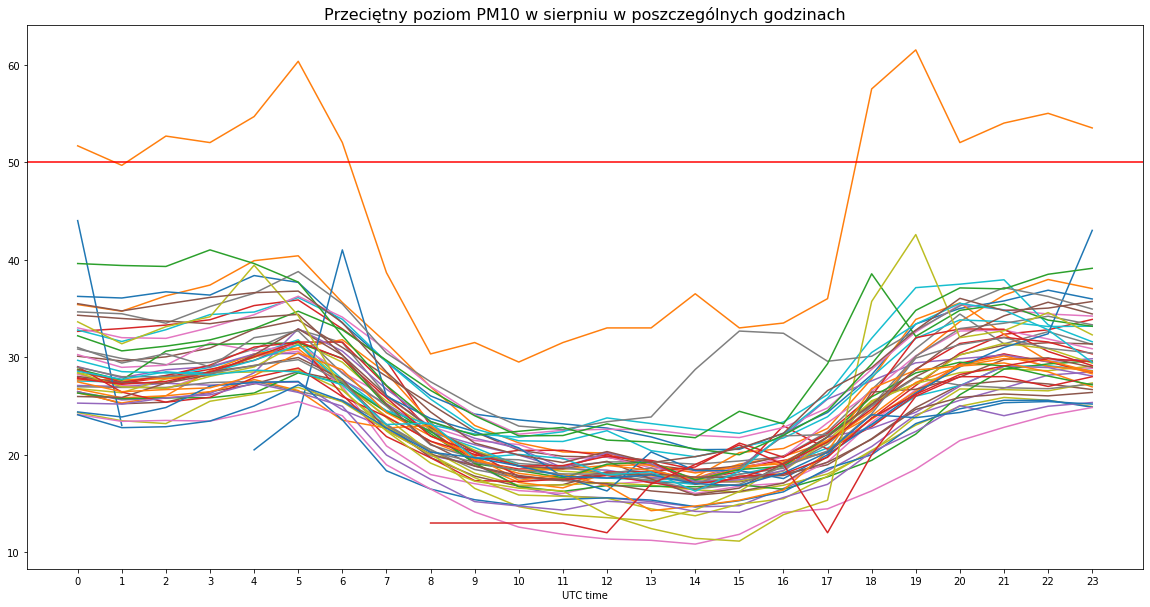

In [59]:
fig, ax = plt.subplots(figsize=(20, 10))
for col in aug_pm10_means.columns:
    aug_pm10_means[col].plot()
_ = plt.axhline(50, label = 'Norma WHO', color="red")
_ = plt.title("Przeciętny poziom PM10 w sierpniu w poszczególnych godzinach", fontsize=16)
_ = plt.xticks(np.arange(24), range(0,24))
_ = plt.show()

Poniższy wykres pudełkowy dobrze ilustruje wahania przeciętnych poziomów odnotowywanych w sierpniu. Przeciętnie najniższe poziomy PM10 w ciągu doby odnotowywuje się w środku dnia. Również odczyty o tej porze charakteryzują się mniejszym rozrzutem obserwowanych wartości.

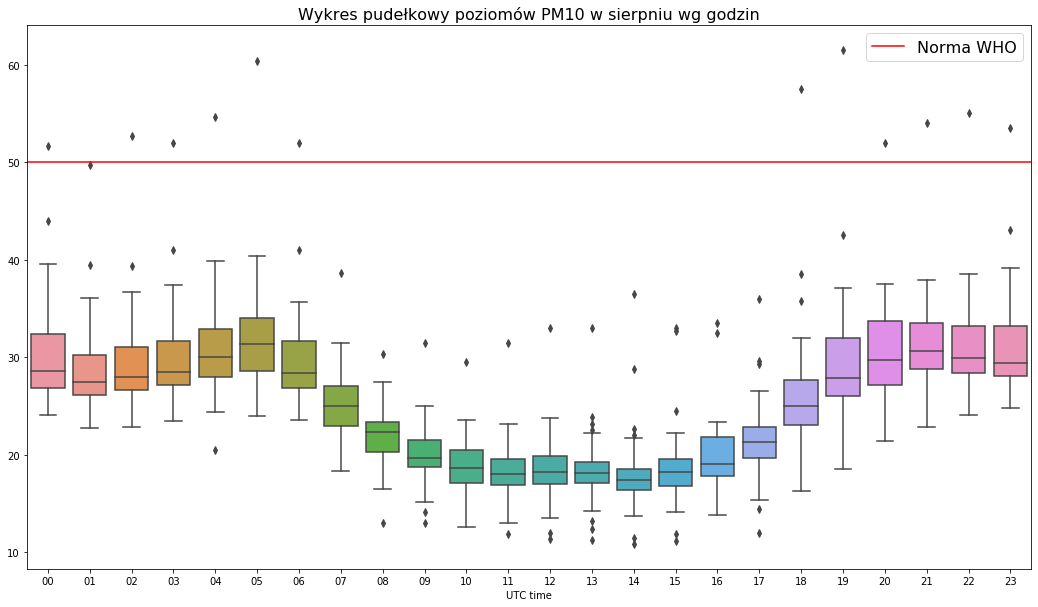

In [60]:
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.boxplot(data=aug_trans)
_ = plt.title("Wykres pudełkowy poziomów PM10 w sierpniu wg godzin", fontsize=16)
_ = plt.axhline(50, label = 'Norma WHO', color="red")
_ = plt.legend(fontsize=16)
_ = plt.show()

### 4.1.2 Miesiące w sezonie grzewczym

Również w miesiącach w sezonie grzewczym można zaoobserwować obniżenie się przeciętnego poziomu pm10 w ciągu dnia. Jednak spadek ten nastepuje w nieco poźniejszych godzianach porannych niż w lecie, a wzrost zanieczyszeń rozpoczyna się już okolo 14. Niesety prawie wszystkie odczyty są wyższe niż te w miesiąch letnich. Również norma WHO w większości przeciętnych odczytów zostaje przekroczona. 

In [61]:
feb = pd.read_csv(all_file_names[3])
feb_col_pm10 = [col for col in feb.columns if "pm10" in col or "UTC time" in col ]
feb_pm10 = feb[feb_col_pm10]
feb["UTC time"] = pd.to_datetime(feb['UTC time'])
feb["UTC time"] = feb["UTC time"].dt.strftime("%H")
feb_pm10_means =feb[feb_col_pm10].groupby("UTC time").mean()

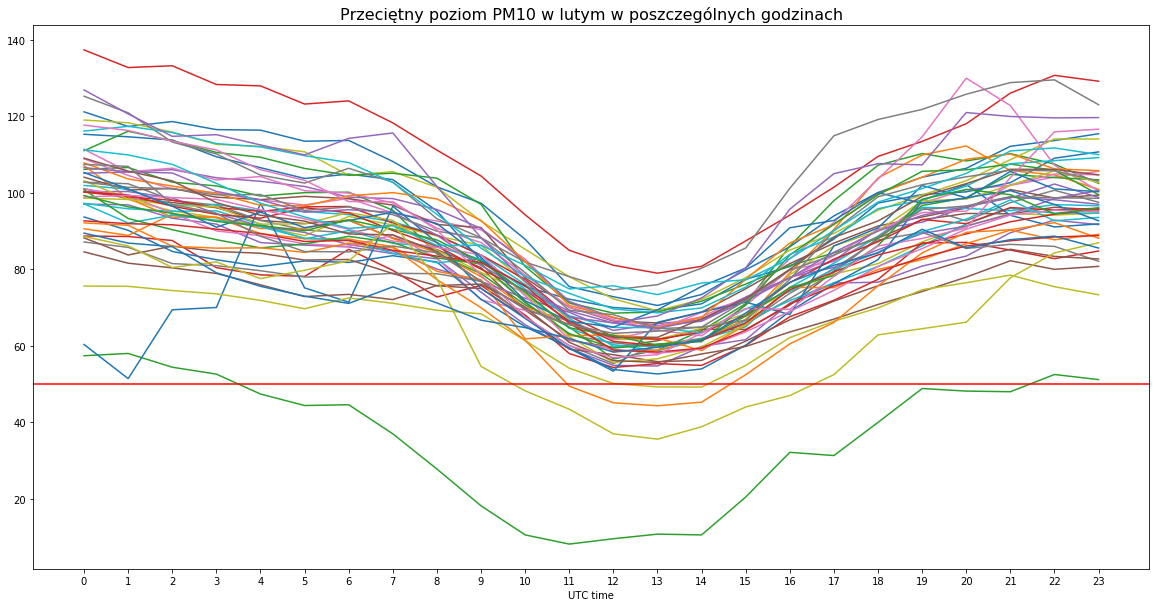

In [62]:
plt.figure(figsize=(20,10))
for col in feb_pm10_means.columns:
    feb_pm10_means[col].plot()
_ = plt.axhline(50, label = 'norma WHO', color="red")
_ = plt.title("Przeciętny poziom PM10 w lutym w poszczególnych godzinach", fontsize=16)
_ = plt.xticks(np.arange(24), range(0,24))
plt.show()
           

Średnie poziomy odczytów PM10 w listopadzie i grudniu niestety wskazują na podobną sytuację jak w lutym. Stan powietrza w tych miesiącach jest dużo gorszy niż w miesiącach letnich.

In [63]:
dec = pd.read_csv(all_file_names[2])
dec["UTC time"] = pd.to_datetime(dec['UTC time'])
dec_col_pm10 = [col for col in dec.columns if "pm10" in col or "UTC time" in col ]
dec_pm10 = dec[dec_col_pm10]
dec["UTC time"] = dec["UTC time"].dt.strftime("%H")
dec_pm10_means = dec[dec_col_pm10].groupby("UTC time").mean()

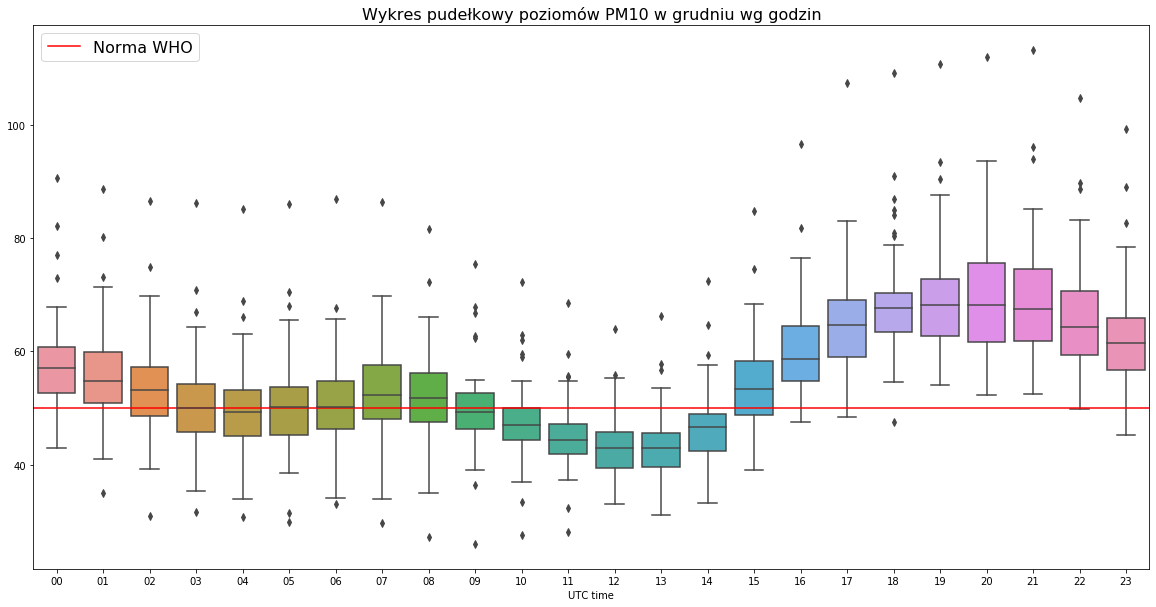

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(data=dec_pm10_means.T)
_ = plt.title("Wykres pudełkowy poziomów PM10 w grudniu wg godzin", fontsize =16)
_ = plt.axhline(50, label = 'Norma WHO', color="red")
_ = plt.legend(fontsize=16)
_ = plt.show()

In [65]:
nov = pd.read_csv(all_file_names[9])
nov["UTC time"] = pd.to_datetime(nov['UTC time'])
nov_col_pm10 = [col for col in nov.columns if "pm10" in col or "UTC time" in col ]
nov_pm10 = nov[nov_col_pm10]
nov["UTC time"] = nov["UTC time"].dt.strftime("%H")
nov_pm10_means = nov[nov_col_pm10].groupby("UTC time").mean()

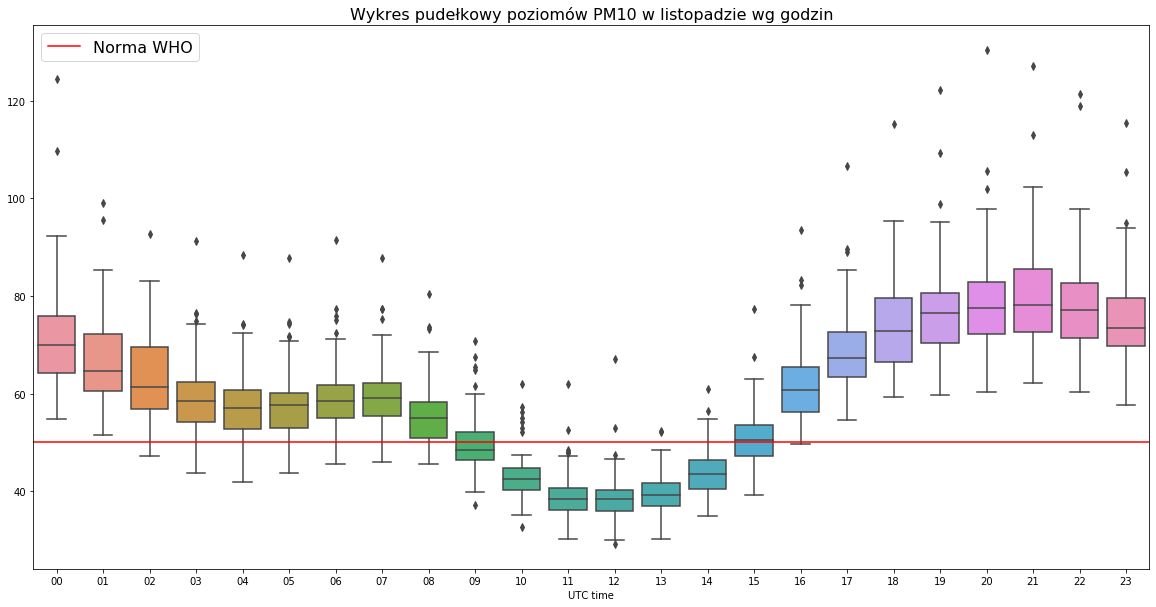

In [66]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(data=nov_pm10_means.T)
_ = plt.title("Wykres pudełkowy poziomów PM10 w listopadzie wg godzin", fontsize=16)
_ = plt.axhline(50, label = 'Norma WHO', color="red")
_ = plt.legend(fontsize=16)
_ = plt.show()

## 4.2 W których dniach tygodnia poziom zanieczyszeń jest najwyższy?

W grudniu 2017  można dostrzec, że skrajnie wysokie pomiary odnotowano częściej od piątku do poniedziałku, niż w pozostałe dni tygodnia.

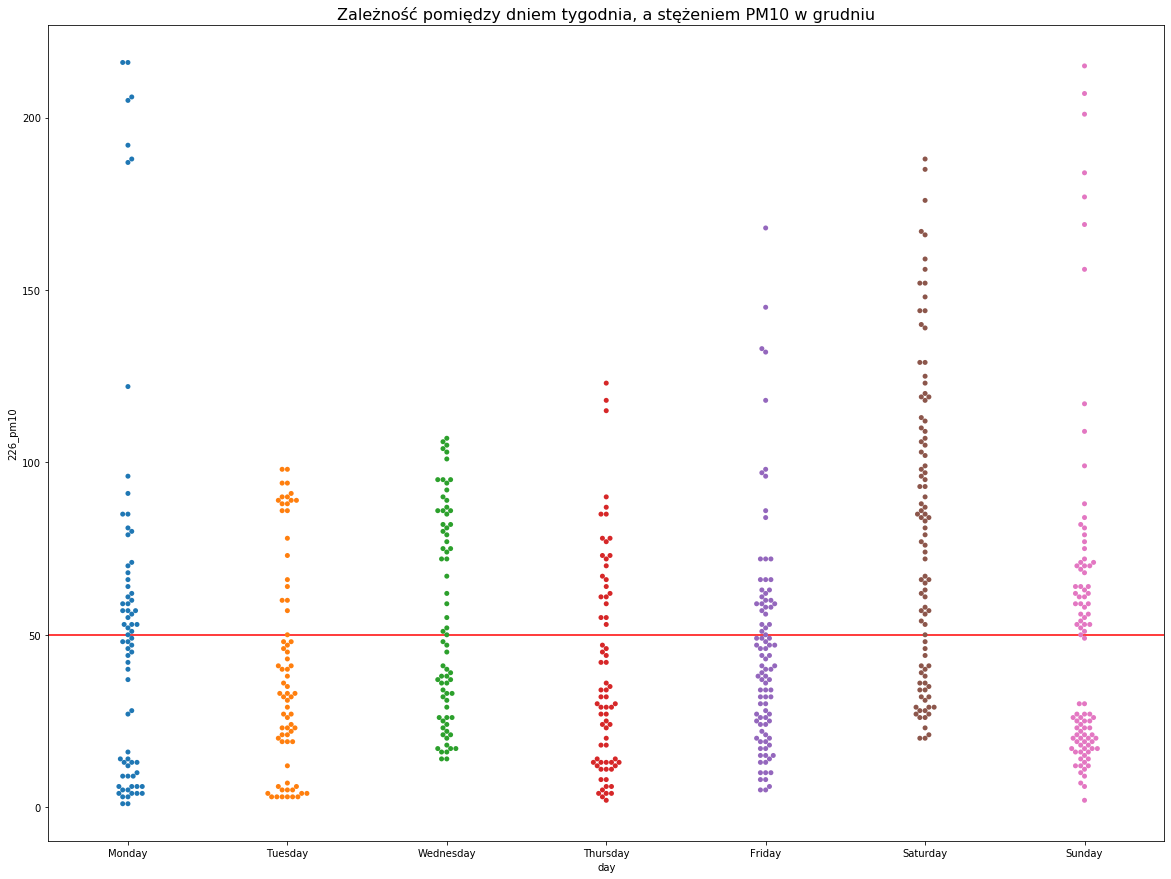

In [67]:
dec = pd.read_csv(all_file_names[2])
dec["UTC time"] = pd.to_datetime(dec['UTC time'])
dec["day"] = dec["UTC time"].apply(lambda x: x.strftime("%A"))
fig, ax = plt.subplots(figsize=(20, 15))
_ = sns.swarmplot(dec["day"], dec["226_pm10"],order=["Monday", "Tuesday", 
                                                     "Wednesday", "Thursday", 
                                                     "Friday","Saturday","Sunday"], c= "#1f77b4")
_ = plt.axhline(50, label = 'Norma WHO', color="red")
_ = plt.title("Zależność pomiędzy dniem tygodnia, a stężeniem PM10 w grudniu", fontsize =16)
_ = plt.show()

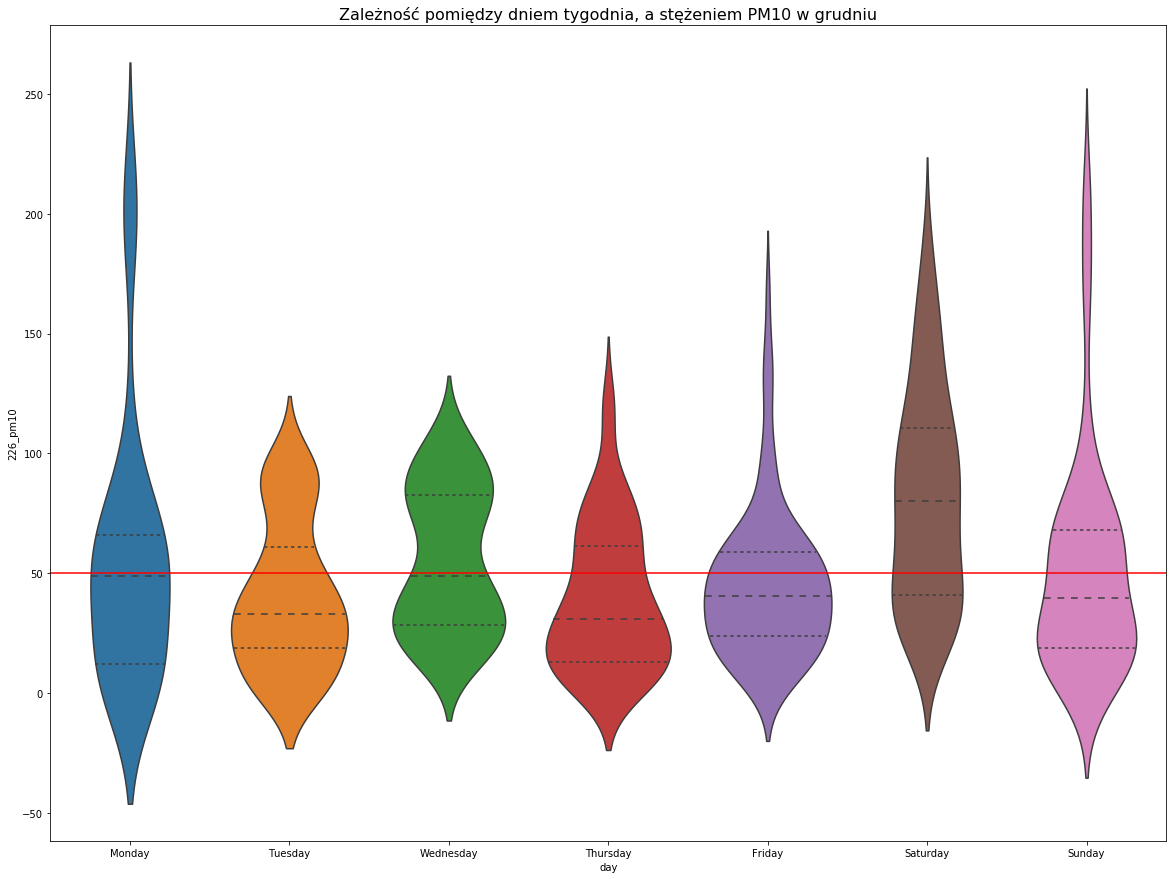

In [68]:
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.violinplot(x=dec["day"], y=dec["226_pm10"], inner="quartile",order=["Monday", "Tuesday", 
                                                                             "Wednesday", "Thursday", 
                                                                             "Friday","Saturday","Sunday"])
_ = plt.axhline(50, label = 'norma WHO', color="red")
_ = plt.title("Zależność pomiędzy dniem tygodnia, a stężeniem PM10 w grudniu", fontsize =16)
_ = plt.show()

Zależności takiej nie zaobserwowano, dla innych miesięcy, ani też dla wszystkich wartości odnotowanych przez sensor 226 w ciągu całego roku.

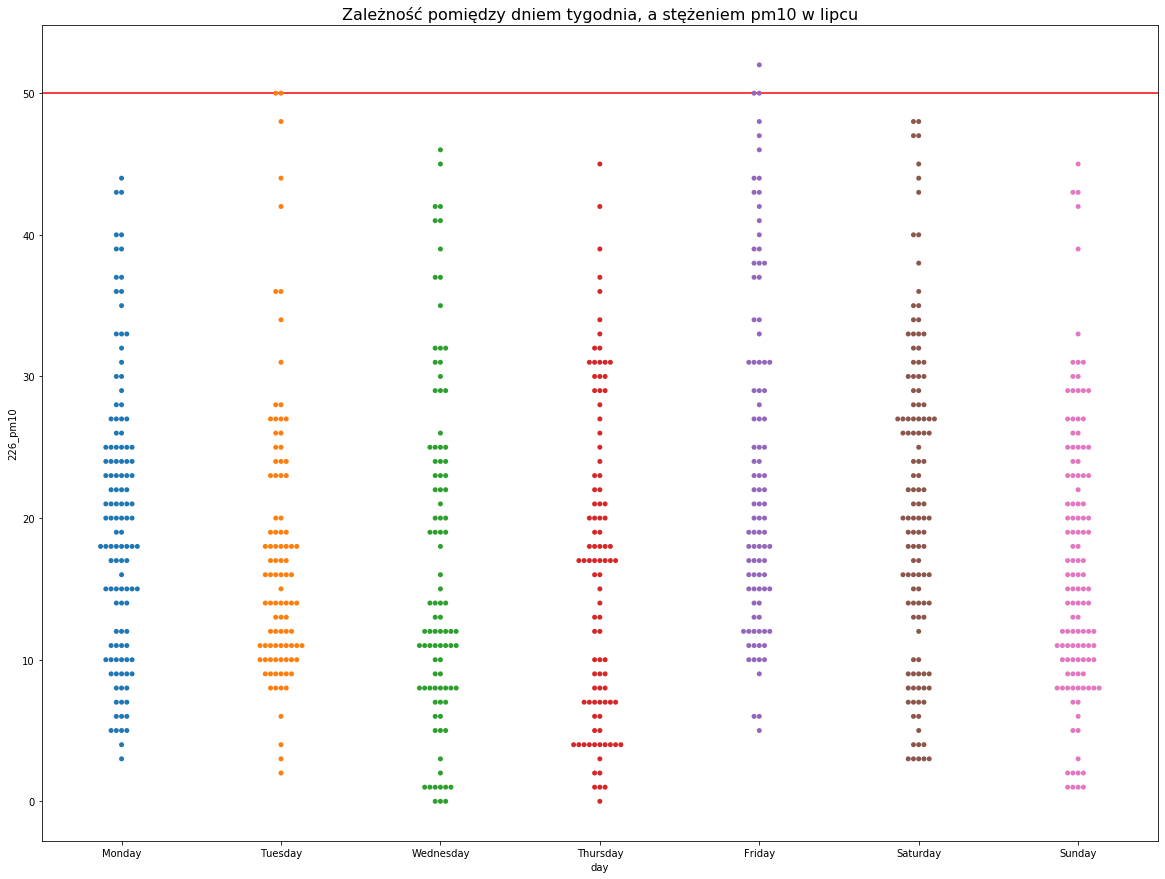

In [69]:
jul = pd.read_csv(all_file_names[5])
jul["UTC time"] = pd.to_datetime(jul['UTC time'])
jul["day"] = jul["UTC time"].apply(lambda x: x.strftime("%A"))
fig, ax = plt.subplots(figsize=(20, 15))
_ = sns.swarmplot(jul["day"], jul["226_pm10"], c= "#1f77b4", order=["Monday", "Tuesday", 
                                                                    "Wednesday", "Thursday", 
                                                                    "Friday","Saturday","Sunday"])
_ = plt.axhline(50, label = 'norma WHO', color="red")
_ = plt.title("Zależność pomiędzy dniem tygodnia, a stężeniem pm10 w lipcu", fontsize =16)
_ = plt.show()

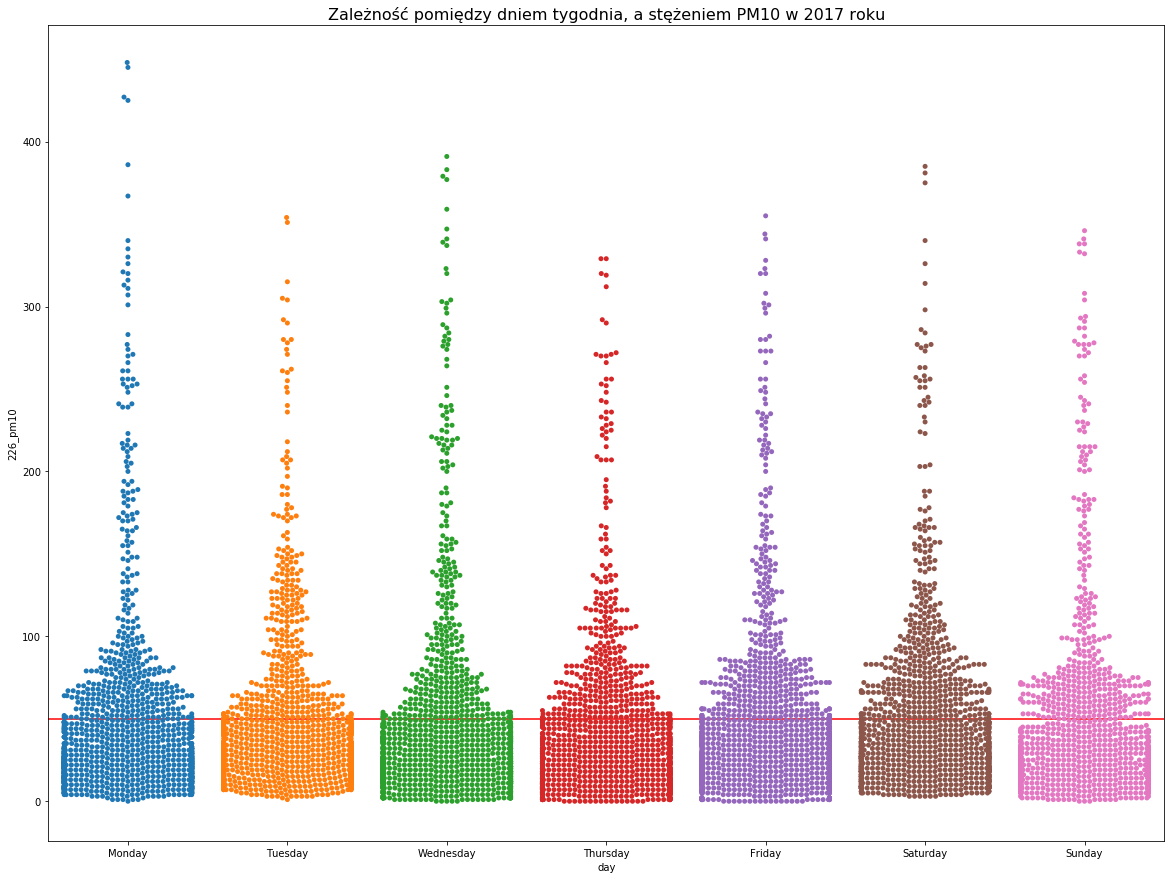

In [70]:
year["UTC time"] = pd.to_datetime(year['UTC time'])
year["day"] = year["UTC time"].apply(lambda x: x.strftime("%A"))
fig, ax = plt.subplots(figsize=(20, 15))
_ = sns.swarmplot(year["day"], year["226_pm10"], c= "#1f77b4", order=["Monday", "Tuesday", 
                                                                      "Wednesday", "Thursday", 
                                                                      "Friday","Saturday","Sunday"])
_ = plt.axhline(50, label = 'norma WHO', color="red")
_ = plt.title("Zależność pomiędzy dniem tygodnia, a stężeniem PM10 w 2017 roku", fontsize=16)
_ = plt.show()

# 5 Podsumowanie

• Poziom zanieczyczeń powietrza PM10, PM2.5 i PM1 jest bardzo silnie dodatnio skorelowany pomiędzy sobą (korelacja blisko 1). Oznacza to w praktyce, że gdy poziom jednego z nich jest wysoki to najprawopdobniej pozostałe dwa znajdują się również na wysokich poziomach.

• Z reguły spadkowi temperatury towarzyszy wzrost zanieczyczeń powietrza, a gdy wzrosta temperatura  poprawia się jakość powietrza. 

• Nieco słabsza, ale uznawana również za umiarkowaną korelację jest dodatnia korelacja pomiędzy zanieczyszczeniami PM10, PM2.5 i PM1, a ciśnieniem. Odczytom z wyższym ciśnieniem z reguły towarzyszą wyższe wskazania zanieczyczeń.

• Wilgotność powietrza jest bardzo słabo skorelowana z pozostałymi zmiennymi.

• Problem zanieczyszenia powietrza dotyczy głównie sezonu grzewczego. W miesiącach letnich stan powietrza jest dużo lepszy niż zimą i nie przekracza norm WHO.

• Zarówno w sezonie grzewczym jak i poza nim najniższe poziomy zanieczyczeń w ciągu doby odnotowywuje się w środku dnia. Po południu następuje wzrost zanieczyszeń, który utrzymuje się nocą na stałym poziomie, by spaść w godzinach porannych. Jednak zmiany te zachodzą intensywniej w zimie niż w lecie (przyczyną tego stanu może być ogrzewanie domów popołudniu i wieczorem tzw. niska emisja).

• W grudniu 2017 można było dostrzec, że skrajnie wysokie podmiary odntowano częsciej od piątku do poniedziału, niż w pozostałe dni tygodnia. W innych miesiącach nie zaobserwowano takiej zależności.